In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/hp/Desktop/EXCELS/Corruption_Perception_Data.csv")

# Dataset Overview

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/hp/Desktop/EXCELS/Corruption_Perception_Data.csv")

# Display basic information about the dataset
print("\n1.1 Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



1.1 Dataset Overview:
Number of rows: 3000
Number of columns: 33


# CPI Score Distribution Over Time


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean CPI score per year
average_cpi = df.groupby('Year')['CPI_Score'].mean().reset_index()
average_cpi

,Year,CPI_Score
0,2000,51.962121
1,2001,52.877863
2,2002,53.713235
3,2003,55.446154
4,2004,54.695652
5,2005,55.863248
6,2006,50.586207
7,2007,57.552239
8,2008,53.743363
9,2009,53.443478


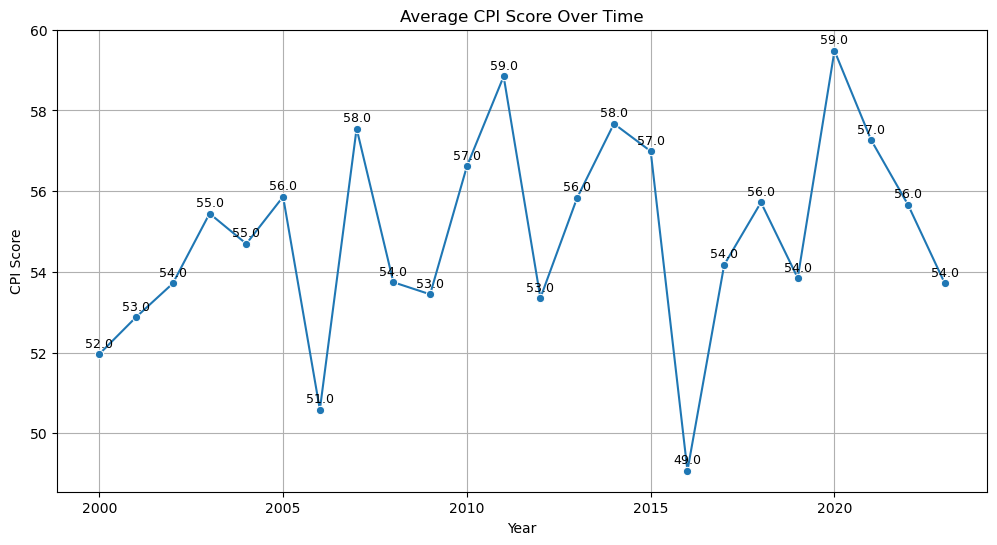

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean CPI score per year
average_cpi = df.groupby('Year')['CPI_Score'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_cpi, x='Year', y='CPI_Score', marker='o', errorbar=None)

# Add data labels
for i in range(len(average_cpi)):
    plt.text(average_cpi['Year'][i], average_cpi['CPI_Score'][i]+0.1,  # +0.1 to slightly offset the text
             round(average_cpi['CPI_Score'][i], 0), 
             ha='center', va='bottom', fontsize=9, color='black')

plt.title("Average CPI Score Over Time")
plt.xlabel("Year")
plt.ylabel("CPI Score")
plt.grid(True)
plt.show()


# Top 10 Least Corrupt Countries (Latest Year)


In [9]:
latest_year = df['Year'].max()
top_cpi = df[df['Year'] == latest_year].sort_values(by='CPI_Score', ascending=False).head(5)
top_cpi

,Country,Year,CPI_Score,Rank,Region,Public_Sector_Corruption,Judicial_Corruption,Police_Corruption,Executive_Branch_Corruption,Legislative_Corruption,...,Government_Effectiveness,Regulatory_Quality,Rule_of_Law,Voice_and_Accountability,GDP_per_Capita,Unemployment_Rate,Inflation_Rate,HDI,Population,Internet_Penetration
438,USA,2023,97,75,Africa,5.837542,3.140774,1.690013,7.126614,0.486013,...,9.043520,1.748573,6.142467,4.478421,21010,19.696272,11.941081,0.329627,1351167129,14.634779
366,Japan,2023,95,57,Africa,4.903504,1.157124,8.293175,3.531892,2.015811,...,9.749581,8.207885,0.299120,6.804916,65727,2.279993,4.420499,0.388540,9104182,88.331254
2954,USA,2023,95,86,Americas,5.904037,2.919036,6.348213,6.014668,2.372203,...,9.723917,2.854791,5.577201,6.418452,26213,4.980293,7.771026,0.446362,191350195,74.144531
828,China,2023,94,125,Oceania,3.289958,6.979760,3.047362,7.165725,2.037343,...,2.241189,3.557640,7.207724,7.909933,33313,6.359371,6.923456,0.476566,1124241363,90.092748
851,USA,2023,94,17,Asia,7.922900,0.089128,9.565876,9.759824,9.970592,...,5.361164,0.669754,7.490119,9.521055,23256,18.002631,7.597014,0.676509,540735293,25.439142


In [10]:
core_corruption_metrics = [
    'Country', 'Year', 'Region',
    'CPI_Score', 'Rank',
    'Public_Sector_Corruption', 'Judicial_Corruption', 'Police_Corruption',
    'Executive_Branch_Corruption', 'Legislative_Corruption', 'Bribery_Index',
    'Business_Corruption', 'Health_Corruption', 'Education_Corruption',
    'Media_Corruption', 'Political_Party_Corruption', 'Foreign_Influence'
]

top_cpi[core_corruption_metrics].style.background_gradient(cmap="Blues")


,Country,Year,Region,CPI_Score,Rank,Public_Sector_Corruption,Judicial_Corruption,Police_Corruption,Executive_Branch_Corruption,Legislative_Corruption,Bribery_Index,Business_Corruption,Health_Corruption,Education_Corruption,Media_Corruption,Political_Party_Corruption,Foreign_Influence
438,USA,2023,Africa,97,75,5.837542,3.140774,1.690013,7.126614,0.486013,1.534412,0.558055,6.308083,0.296635,2.972467,8.059719,7.036745
366,Japan,2023,Africa,95,57,4.903504,1.157124,8.293175,3.531892,2.015811,7.602586,2.772899,4.625461,7.503407,6.423697,4.130020,8.912497
2954,USA,2023,Americas,95,86,5.904037,2.919036,6.348213,6.014668,2.372203,3.152721,8.494396,5.518946,6.824289,7.464680,2.719339,6.873174
828,China,2023,Oceania,94,125,3.289958,6.979760,3.047362,7.165725,2.037343,9.298053,0.559841,9.525163,8.440811,5.167061,1.891529,2.884557
851,USA,2023,Asia,94,17,7.922900,0.089128,9.565876,9.759824,9.970592,6.735551,7.675427,6.105137,8.436421,1.925455,8.702102,4.860437


In [11]:
governance_indicators = [
    'Country', 'Year', 'Region',
    'Corporate_Governance', 'Transparency_Index', 'Freedom_of_Press',
    'Civil_Liberties', 'Democracy_Index', 'Human_Rights_Index',
    'Government_Effectiveness', 'Regulatory_Quality', 'Rule_of_Law',
    'Voice_and_Accountability'
]

top_cpi[governance_indicators].style.background_gradient(cmap="Purples")


,Country,Year,Region,Corporate_Governance,Transparency_Index,Freedom_of_Press,Civil_Liberties,Democracy_Index,Human_Rights_Index,Government_Effectiveness,Regulatory_Quality,Rule_of_Law,Voice_and_Accountability
438,USA,2023,Africa,6.726743,1.477321,2.797200,9.798596,2.125643,9.662622,9.043520,1.748573,6.142467,4.478421
366,Japan,2023,Africa,7.903308,7.356661,7.302982,7.655706,4.008025,9.618560,9.749581,8.207885,0.299120,6.804916
2954,USA,2023,Americas,6.941986,2.300338,3.859395,4.488705,9.856264,9.656735,9.723917,2.854791,5.577201,6.418452
828,China,2023,Oceania,9.375423,8.580053,0.623435,7.067957,8.072917,3.157606,2.241189,3.557640,7.207724,7.909933
851,USA,2023,Asia,2.401933,0.711082,2.470451,3.646430,7.981666,5.018771,5.361164,0.669754,7.490119,9.521055


In [12]:
development_indicators = [
    'Country', 'Year', 'Region',
    'GDP_per_Capita', 'Unemployment_Rate', 'Inflation_Rate',
    'HDI', 'Population', 'Internet_Penetration'
]

top_cpi[development_indicators].style.background_gradient(cmap="Oranges")


,Country,Year,Region,GDP_per_Capita,Unemployment_Rate,Inflation_Rate,HDI,Population,Internet_Penetration
438,USA,2023,Africa,21010,19.696272,11.941081,0.329627,1351167129,14.634779
366,Japan,2023,Africa,65727,2.279993,4.420499,0.388540,9104182,88.331254
2954,USA,2023,Americas,26213,4.980293,7.771026,0.446362,191350195,74.144531
828,China,2023,Oceania,33313,6.359371,6.923456,0.476566,1124241363,90.092748
851,USA,2023,Asia,23256,18.002631,7.597014,0.676509,540735293,25.439142


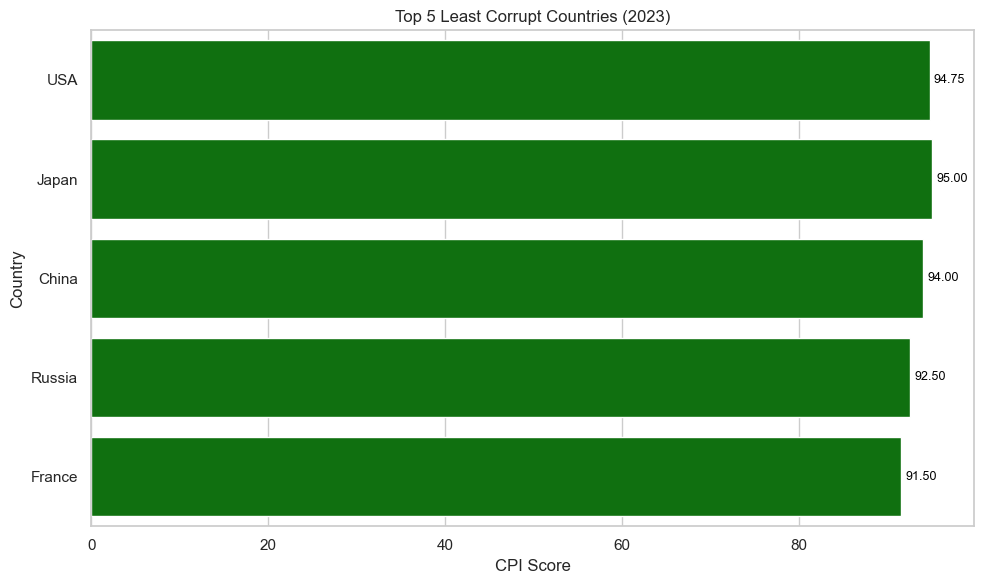

In [93]:
latest_year = df['Year'].max()
top_cpi = df[df['Year'] == latest_year].sort_values(by='CPI_Score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_cpi, x='CPI_Score', y='Country', color='green', errorbar=None)

# Add data labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, color='black', fontsize=9)

plt.title(f"Top 5 Least Corrupt Countries ({latest_year})")
plt.xlabel("CPI Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Bottom 10 Most Corrupt Countries (Latest Year)


In [16]:
latest_year = df['Year'].max()
bottom_cpi = df[df['Year'] == latest_year].sort_values(by='CPI_Score').head(10)
bottom_cpi

,Country,Year,CPI_Score,Rank,Region,Public_Sector_Corruption,Judicial_Corruption,Police_Corruption,Executive_Branch_Corruption,Legislative_Corruption,...,Government_Effectiveness,Regulatory_Quality,Rule_of_Law,Voice_and_Accountability,GDP_per_Capita,Unemployment_Rate,Inflation_Rate,HDI,Population,Internet_Penetration
97,UK,2023,10,139,Asia,6.127221,7.038527,9.870231,8.614986,7.414909,...,5.444989,2.565126,4.507480,0.955511,58491,15.663740,8.419247,0.014362,964253872,31.585964
2656,Russia,2023,10,168,Asia,1.354586,8.847569,9.488968,0.683625,8.310038,...,9.666677,4.562384,2.813976,5.802546,29130,13.788665,13.943021,0.587347,1128489000,15.902238
1633,Russia,2023,10,179,Europe,9.990095,8.138022,6.615413,4.711279,7.440865,...,1.369789,5.805833,9.723974,7.600261,26652,11.363205,4.006839,0.111920,965185483,76.335545
823,Brazil,2023,10,101,Oceania,2.634428,0.321309,2.536202,4.794639,3.190652,...,8.428583,5.562622,0.295713,0.219454,20978,8.833986,5.549366,0.344539,1009982618,34.146535
548,USA,2023,11,172,Asia,4.586608,4.307744,6.293626,0.151662,6.707115,...,6.597194,7.820840,3.409161,9.504673,46592,11.297857,4.827444,0.513507,1228854842,80.382433
2432,Brazil,2023,13,126,Americas,8.737092,3.498087,5.125226,8.455989,8.132168,...,0.344670,8.154759,6.263719,2.425007,14418,13.362070,12.772857,0.144020,671620957,69.513165
961,USA,2023,14,21,Asia,0.729170,3.734686,3.052665,0.349348,7.251923,...,9.055700,2.419861,4.271249,2.930332,58387,3.685854,13.329284,0.726573,10027661,32.472593
1528,Brazil,2023,14,77,Asia,8.372899,6.857270,7.595929,0.087926,4.582804,...,7.840506,2.984295,1.991303,7.232601,20484,3.924394,13.604666,0.293032,88430449,35.518230
1424,France,2023,15,65,Americas,5.220234,5.381151,7.329697,0.121380,5.480869,...,3.747897,4.470564,7.527925,1.838459,68503,18.592090,11.781083,0.497815,197362725,10.943466
980,Russia,2023,16,64,Oceania,3.475583,4.824720,4.327799,1.526358,8.362550,...,2.619476,4.700897,0.129709,9.786486,20815,19.907027,5.225661,0.675545,63800932,51.658632


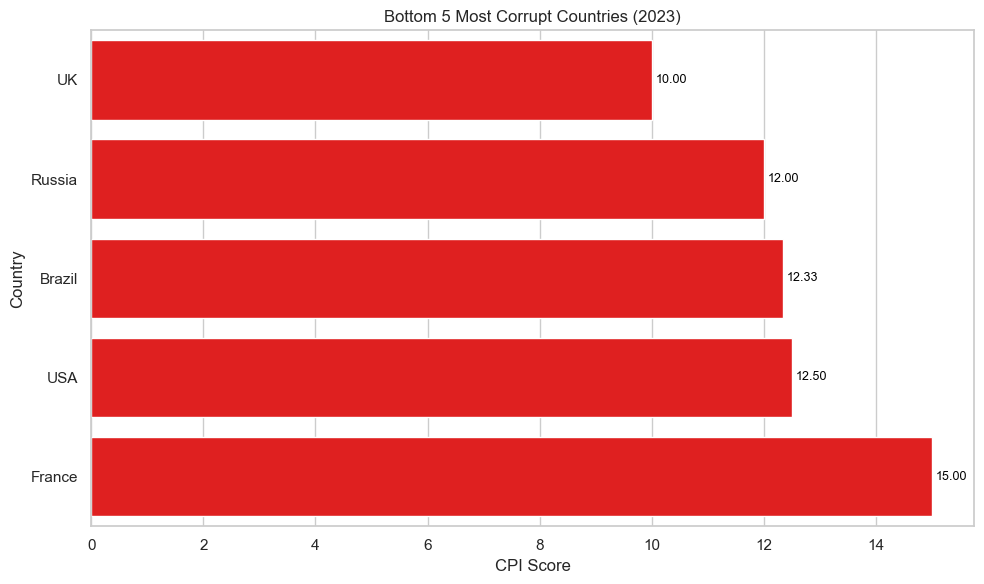

In [95]:
latest_year = df['Year'].max()
bottom_cpi = df[df['Year'] == latest_year].sort_values(by='CPI_Score').head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=bottom_cpi, x='CPI_Score', y='Country', color='red', errorbar=None)

# Add data labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, color='black', fontsize=9)

plt.title(f"Bottom 5 Most Corrupt Countries ({latest_year})")
plt.xlabel("CPI Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Regional & Temporal Corruption Trends


In [19]:
# Core Corruption Metrics
core_corruption_metrics = [
    'CPI_Score', 'Rank',
    'Public_Sector_Corruption', 'Judicial_Corruption', 'Police_Corruption',
    'Executive_Branch_Corruption', 'Legislative_Corruption', 'Bribery_Index',
    'Business_Corruption', 'Health_Corruption', 'Education_Corruption',
    'Media_Corruption', 'Political_Party_Corruption', 'Foreign_Influence'
]

In [20]:
df_latest = df.loc[df.groupby('Country')['Year'].idxmax()]
region_corruption = df_latest.groupby('Region')[core_corruption_metrics].mean().reset_index()
region_corruption_melted = region_corruption.melt(id_vars='Region', var_name='Sector', value_name='Avg Corruption Score')
region_corruption_melted

,Region,Sector,Avg Corruption Score
0,Africa,CPI_Score,58.000000
1,Americas,CPI_Score,47.000000
2,Asia,CPI_Score,26.000000
3,Europe,CPI_Score,72.000000
4,Oceania,CPI_Score,76.500000
...,...,...,...
65,Africa,Foreign_Influence,7.122804
66,Americas,Foreign_Influence,4.398890
67,Asia,Foreign_Influence,4.497858
68,Europe,Foreign_Influence,1.447489


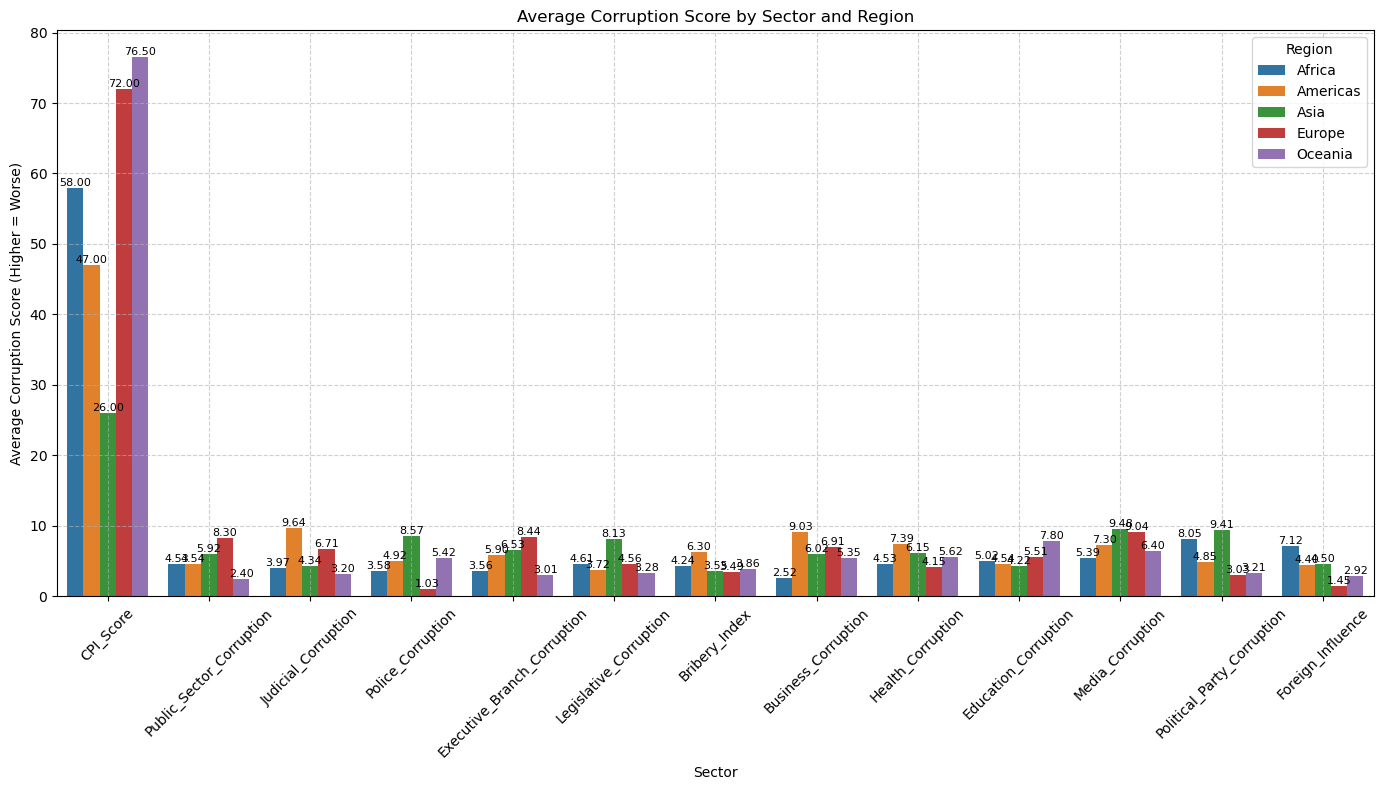

In [21]:
# Remove 'Rank' from core_corruption_metrics
core_corruption_metrics_clean = [
    col for col in core_corruption_metrics if col != 'Rank'
]

# Prepare data
df_latest = df.loc[df.groupby('Country')['Year'].idxmax()]
region_corruption = df_latest.groupby('Region')[core_corruption_metrics_clean].mean().reset_index()
region_corruption_melted = region_corruption.melt(id_vars='Region', var_name='Sector', value_name='Avg Corruption Score')

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=region_corruption_melted, x='Sector', y='Avg Corruption Score', hue='Region', errorbar=None)

plt.xticks(rotation=45)
plt.title("Average Corruption Score by Sector and Region")
plt.ylabel("Average Corruption Score (Higher = Worse)")
plt.xlabel("Sector")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Region")
plt.tight_layout()

# Optional: Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8)

plt.show()


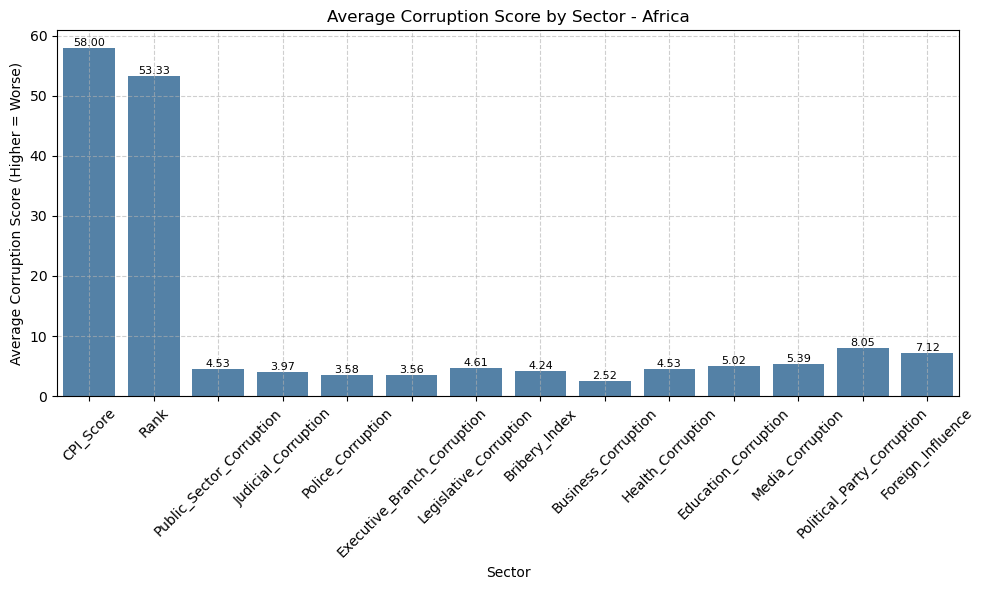

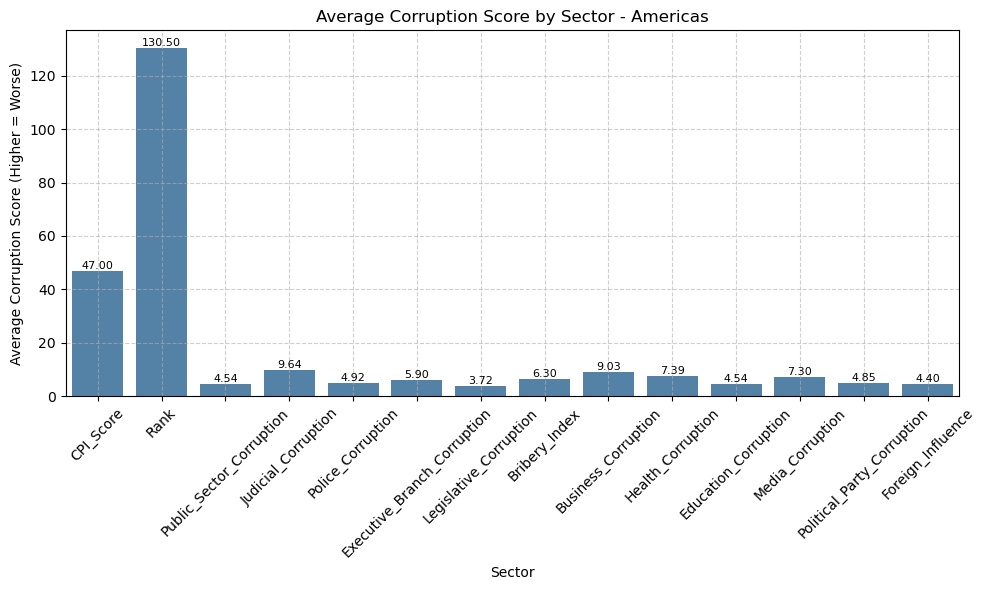

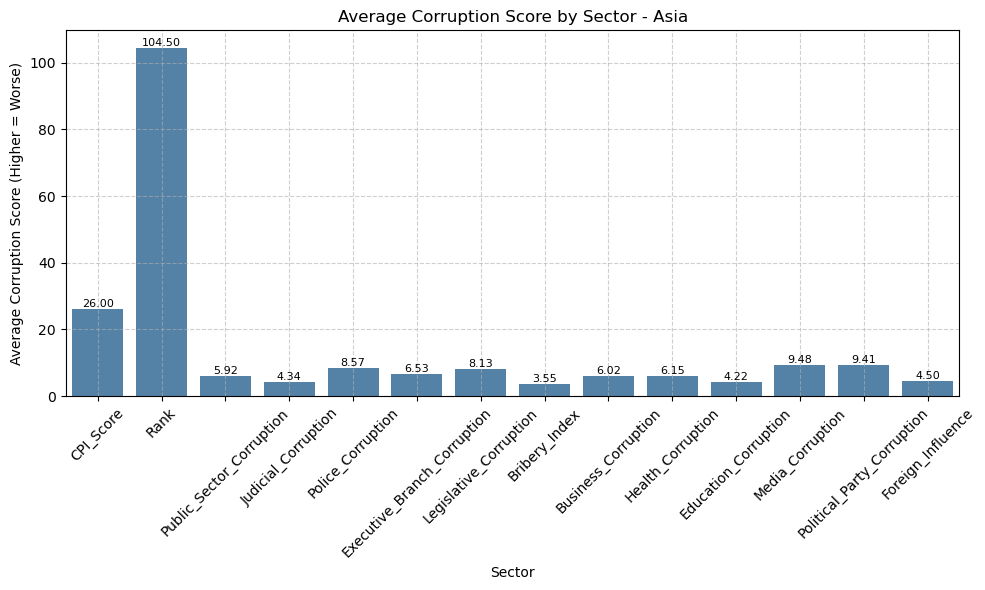

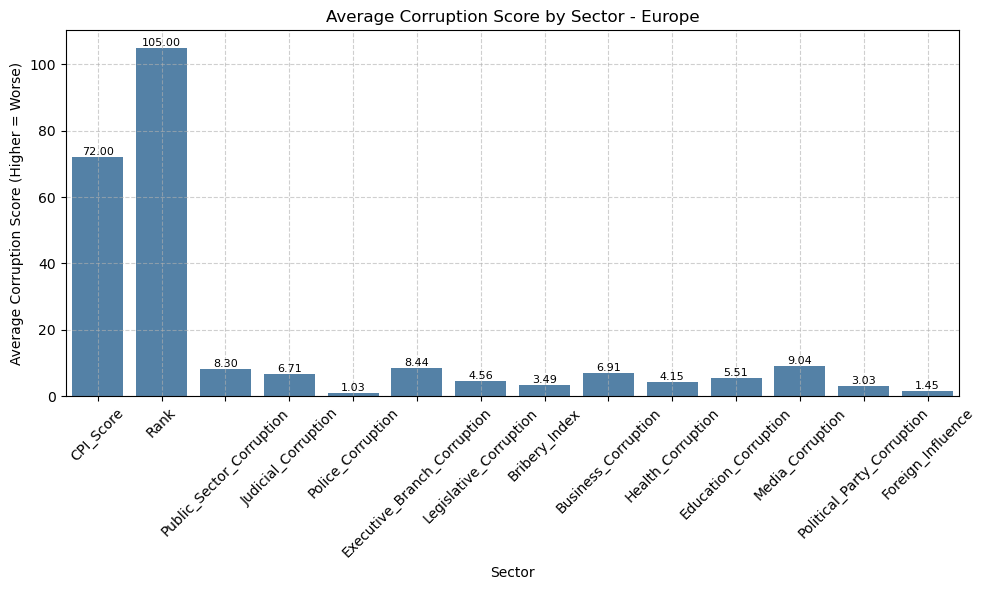

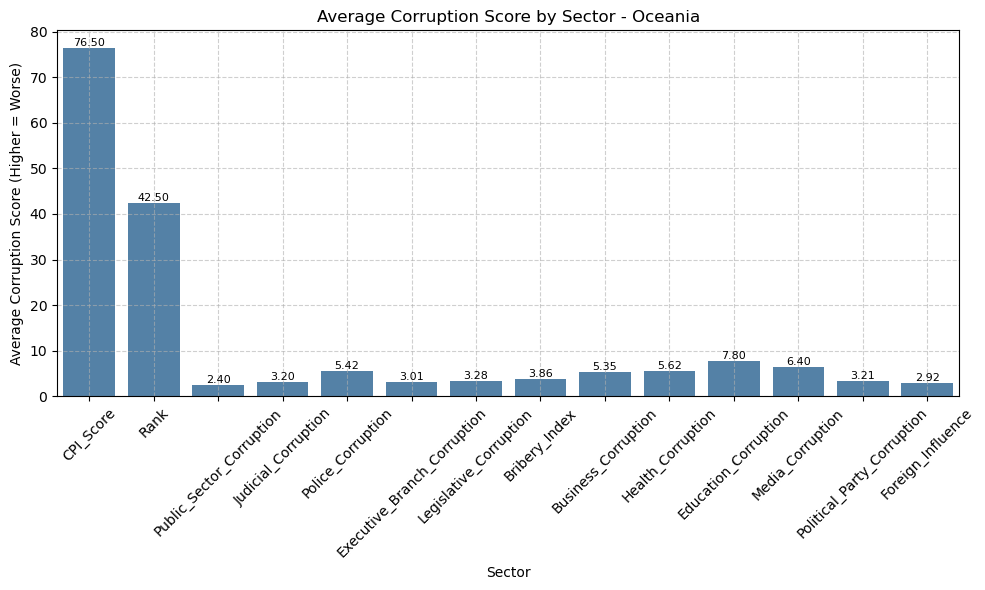

In [22]:
df_latest = df.loc[df.groupby('Country')['Year'].idxmax()]
region_corruption = df_latest.groupby('Region')[core_corruption_metrics].mean().reset_index()
region_corruption_melted = region_corruption.melt(id_vars='Region', var_name='Sector', value_name='Avg Corruption Score')

# Get unique regions
regions = region_corruption_melted['Region'].unique()

# Plot one figure per region
for region in regions:
    region_data = region_corruption_melted[region_corruption_melted['Region'] == region]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=region_data, x='Sector', y='Avg Corruption Score', color='steelblue', errorbar=None)
    
    plt.xticks(rotation=45)
    plt.title(f"Average Corruption Score by Sector - {region}")
    plt.ylabel("Average Corruption Score (Higher = Worse)")
    plt.xlabel("Sector")
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=8)

    plt.tight_layout()
    plt.show()


# Regional Average CPI Trend Over Time


In [24]:
regional_trend = df.groupby(['Region', 'Year'])['CPI_Score'].mean().reset_index()
regional_trend

,Region,Year,CPI_Score
0,Africa,2000,53.227273
1,Africa,2001,48.217391
2,Africa,2002,48.312500
3,Africa,2003,56.617647
4,Africa,2004,58.090909
...,...,...,...
115,Oceania,2019,55.680000
116,Oceania,2020,61.076923
117,Oceania,2021,56.720000
118,Oceania,2022,58.115385


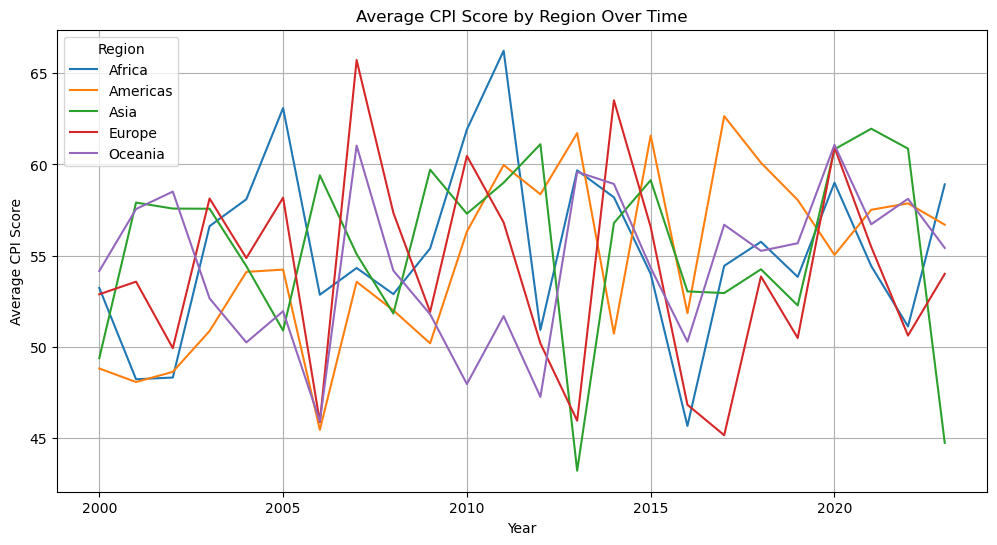

In [25]:
regional_trend = df.groupby(['Region', 'Year'])['CPI_Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_trend, x='Year', y='CPI_Score', hue='Region')
plt.title("Average CPI Score by Region Over Time")
plt.xlabel("Year")
plt.ylabel("Average CPI Score")
plt.legend(title="Region")
plt.grid(True)
plt.show()

# Sector-Wise Corruption

In [28]:
import matplotlib.pyplot as plt

sector_columns = ['Public_Sector_Corruption', 'Judicial_Corruption', 'Police_Corruption',
                  'Executive_Branch_Corruption', 'Legislative_Corruption']
avg_sector = df[sector_columns].mean().sort_values(ascending=False)

# Normalize the scores to sum up to 100%
total_score = avg_sector.sum()
normalized_scores = avg_sector / total_score * 100
normalized_scores

Legislative_Corruption         20.282861
Public_Sector_Corruption       20.027582
Judicial_Corruption            19.960402
Executive_Branch_Corruption    19.908662
Police_Corruption              19.820493
dtype: float64

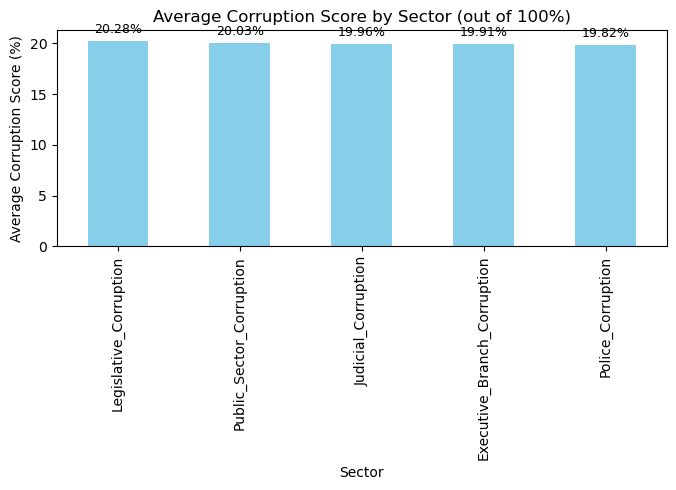

In [29]:
import matplotlib.pyplot as plt

sector_columns = ['Public_Sector_Corruption', 'Judicial_Corruption', 'Police_Corruption',
                  'Executive_Branch_Corruption', 'Legislative_Corruption']
avg_sector = df[sector_columns].mean().sort_values(ascending=False)

# Normalize the scores to sum up to 100%
total_score = avg_sector.sum()
normalized_scores = avg_sector / total_score * 100

plt.figure(figsize=(7, 5))
ax = normalized_scores.plot(kind='bar', color='skyblue')

# Add value labels
for i, v in enumerate(normalized_scores):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom', fontsize=9, color='black')

plt.title("Average Corruption Score by Sector (out of 100%)")
plt.xlabel("Sector")
plt.ylabel("Average Corruption Score (%)")
plt.tight_layout()
plt.show()

# Correlation Between CPI and Sector Corruption

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(correlations, title):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=correlations.values, y=correlations.index, color="green")
    plt.title(title)
    plt.axvline(0, color='black', linestyle='--')
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def compute_correlation(df, cols, cpi_col='CPI_Score'):
    all_cols = cols + [cpi_col]
    return df[all_cols].corr()[cpi_col].drop(cpi_col).sort_values(ascending=False)


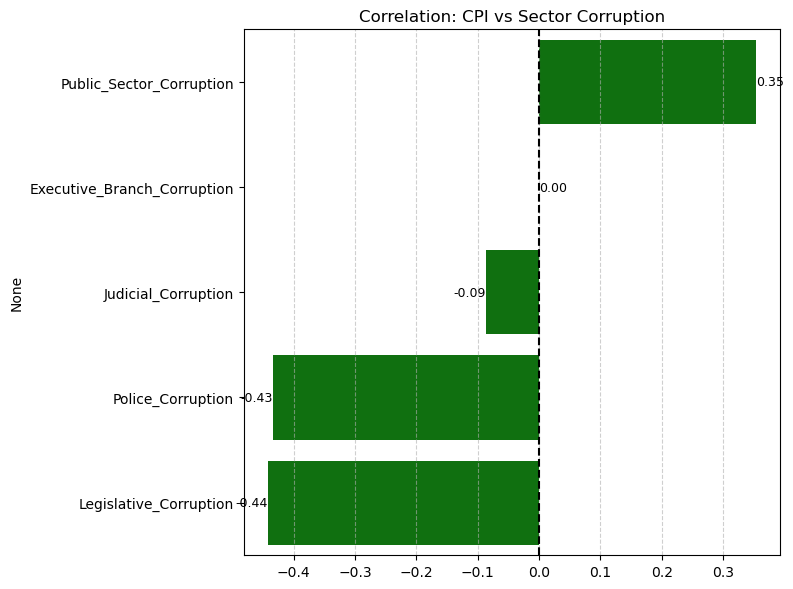

In [33]:
correlations_sector = compute_correlation(df_latest, sector_columns)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=correlations_sector.values, y=correlations_sector.index, color="green")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9)

plt.title("Correlation: CPI vs Sector Corruption")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Country-Wise Sector-Wise Corruption


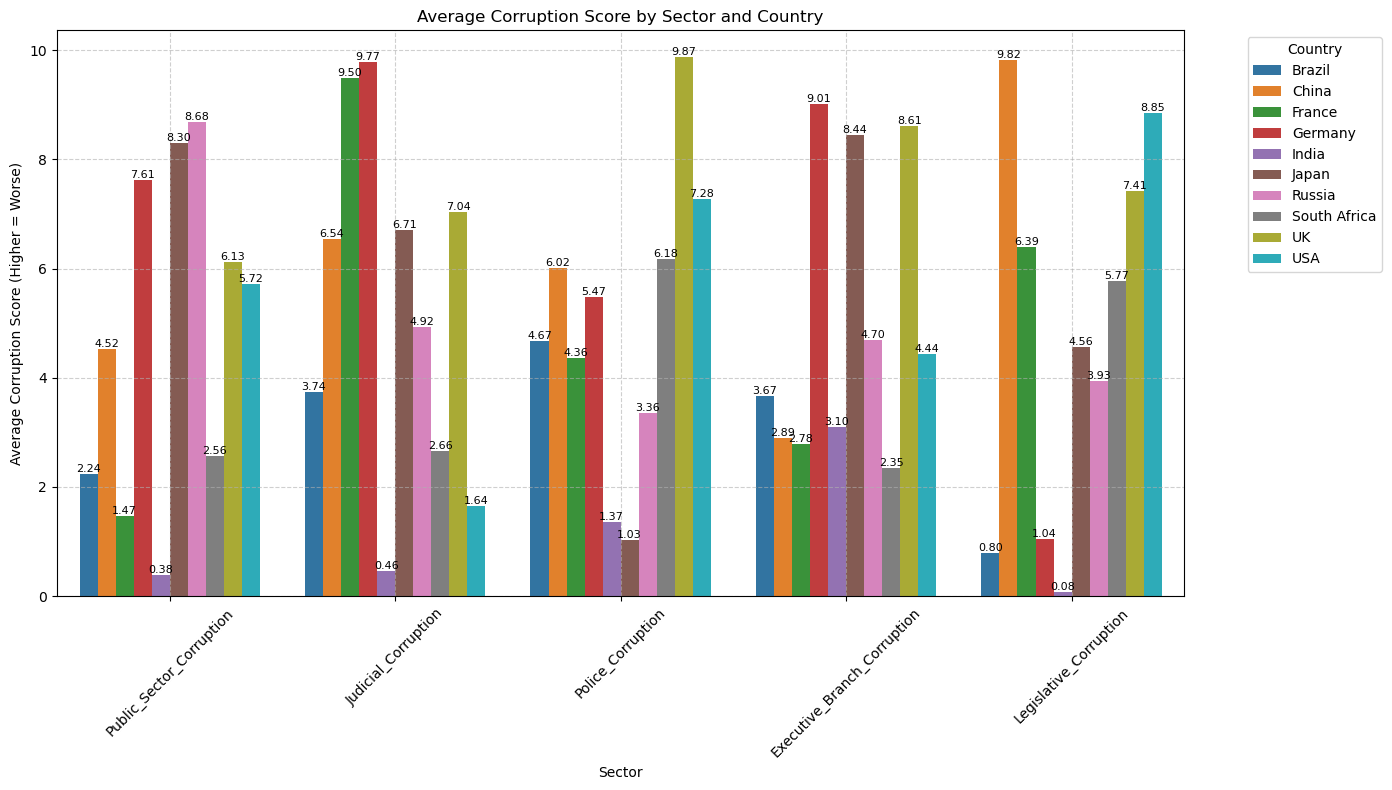

In [38]:
df_latest = df.loc[df.groupby('Country')['Year'].idxmax()]
region_corruption = df_latest.groupby('Country')[sector_columns].mean().reset_index()
region_corruption_melted = region_corruption.melt(id_vars='Country', var_name='Sector', value_name='Avg Corruption Score')

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=region_corruption_melted, x='Sector', y='Avg Corruption Score', hue='Country', errorbar=None)

plt.xticks(rotation=45)
plt.title("Average Corruption Score by Sector and Country")
plt.ylabel("Average Corruption Score (Higher = Worse)")
plt.xlabel("Sector")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside plot for clarity
plt.tight_layout()

# Optional: Add value labels (can be messy if many countries)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8)

plt.show()



Top 5 Countries - Public Sector Corruption:
Country  Public_Sector_Corruption
 Russia                  8.684626
  Japan                  8.299575
Germany                  7.613887
     UK                  6.127221
    USA                  5.718826

Top 5 Countries - Judicial Corruption:
Country  Judicial_Corruption
Germany             9.774743
 France             9.499248
     UK             7.038527
  Japan             6.707102
  China             6.537201

Top 5 Countries - Police Corruption:
     Country  Police_Corruption
          UK           9.870231
         USA           7.279024
South Africa           6.182003
       China           6.018069
     Germany           5.472928

Top 5 Countries - Executive Branch Corruption:
Country  Executive_Branch_Corruption
Germany                     9.012660
     UK                     8.614986
  Japan                     8.438590
 Russia                     4.697519
    USA                     4.440387

Top 5 Countries - Legislative Corrup

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3836599714.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)  # Hide legend since hue is just for coloring


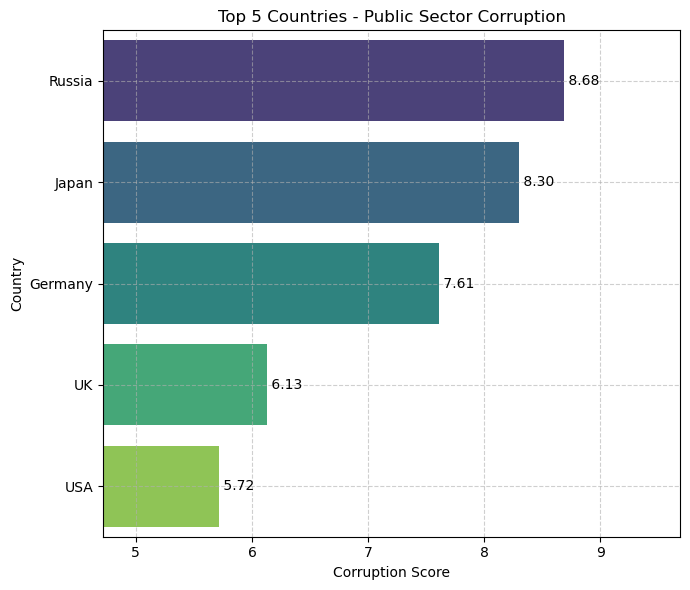

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3836599714.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)  # Hide legend since hue is just for coloring


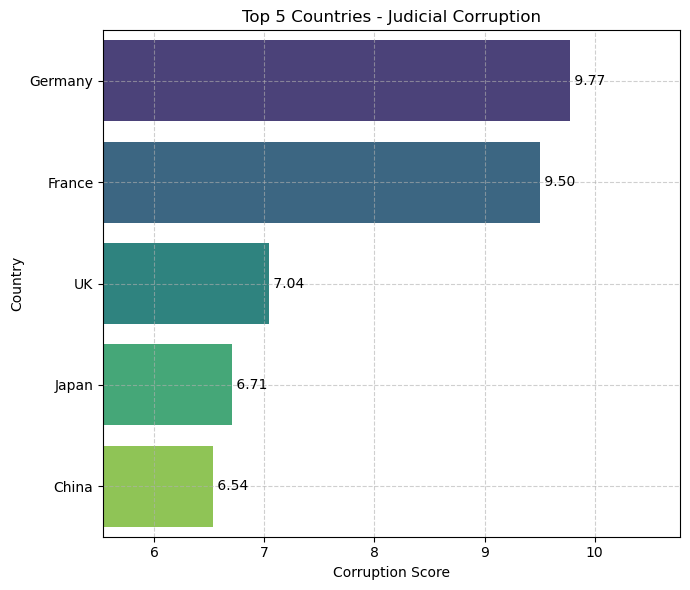

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3836599714.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)  # Hide legend since hue is just for coloring


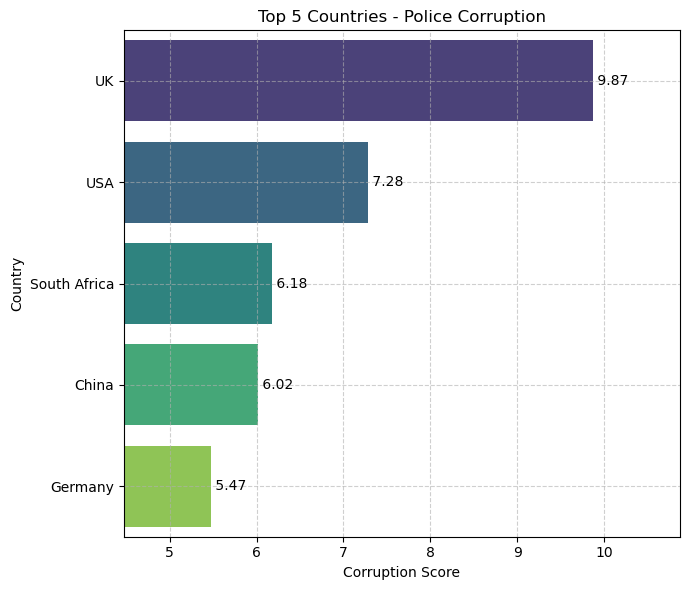

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3836599714.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)  # Hide legend since hue is just for coloring


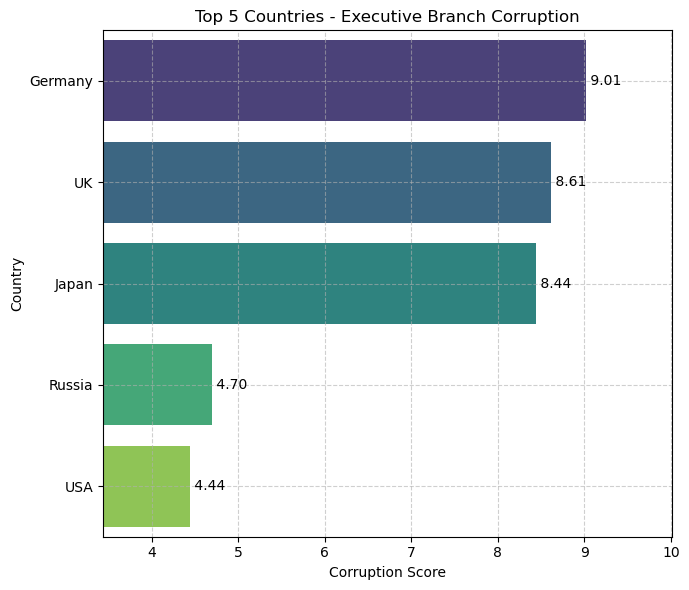

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3836599714.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)  # Hide legend since hue is just for coloring


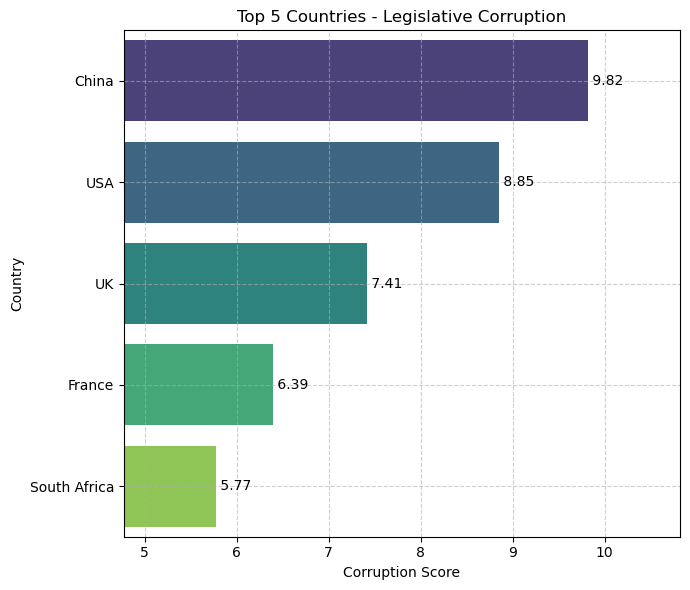

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of corruption sectors (columns)
sectors = [
    'Public_Sector_Corruption',
    'Judicial_Corruption',
    'Police_Corruption',
    'Executive_Branch_Corruption',
    'Legislative_Corruption'
]

# Dictionary to store top 5 per sector
top_corrupt_per_sector = {}

# Get top 5 corrupt countries per sector
for sector in sectors:
    top_corrupt = df_latest[['Country', sector]].sort_values(by=sector, ascending=False).head(5)
    top_corrupt_per_sector[sector] = top_corrupt
    print(f"\nTop 5 Countries - {sector.replace('_', ' ')}:")
    print(top_corrupt.to_string(index=False))

# Plotting with value labels
for sector, df_sector in top_corrupt_per_sector.items():
    plt.figure(figsize=(7, 6))
    ax = sns.barplot(data=df_sector, x=sector, y='Country', hue='Country', palette="viridis", dodge=False)

    # Add value labels
    for i, (idx, row) in enumerate(df_sector.iterrows()):
        ax.text(row[sector], i, f' {row[sector]:.2f}', color='black', va='center', fontsize=10)

    # Formatting
    plt.title(f"Top 5 Countries - {sector.replace('_', ' ')}")
    plt.xlabel("Corruption Score")
    plt.ylabel("Country")
    plt.xlim(df_sector[sector].min() - 1, df_sector[sector].max() + 1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend().set_visible(False)  # Hide legend since hue is just for coloring
    plt.tight_layout()
    plt.show()

# Political & Freedom Indicators

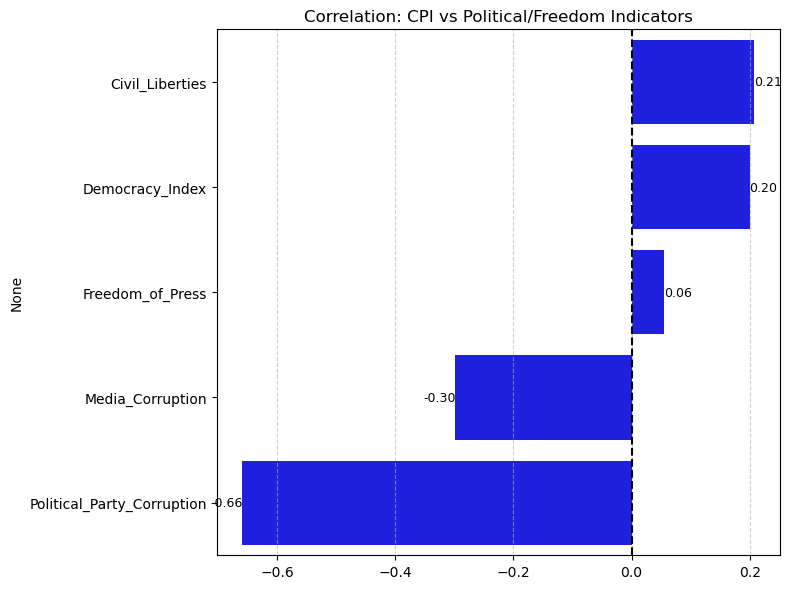

In [42]:
political_columns = [
    'Democracy_Index', 'Freedom_of_Press', 'Civil_Liberties',
    'Political_Party_Corruption', 'Media_Corruption'
]
correlations_political = compute_correlation(df_latest, political_columns)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=correlations_political.values, y=correlations_political.index, color="blue")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9)

plt.title("Correlation: CPI vs Political/Freedom Indicators")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Country-Wise Political & Freedom Indicators


Top 5 Countries - Democracy Index (highest priority):
Country  Year  Democracy_Index
  China  2023         7.408475
    USA  2023         5.326156
 Russia  2023         4.155529
Germany  2023         4.100714
  India  2023         3.883519

Top 5 Countries - Freedom of Press (highest priority):
Country  Year  Freedom_of_Press
 Russia  2023          9.655248
    USA  2023          7.700344
  Japan  2023          7.538390
  China  2023          7.393619
     UK  2023          6.258061

Top 5 Countries - Civil Liberties (highest priority):
     Country  Year  Civil_Liberties
       Japan  2023         9.657674
South Africa  2023         8.065317
      Russia  2023         8.057962
          UK  2023         7.952440
         USA  2023         5.357545

Top 5 Countries - Political Party Corruption (lowest priority):
     Country  Year  Political_Party_Corruption
     Germany  2023                    0.371114
      Brazil  2023                    1.887540
       Japan  2023                

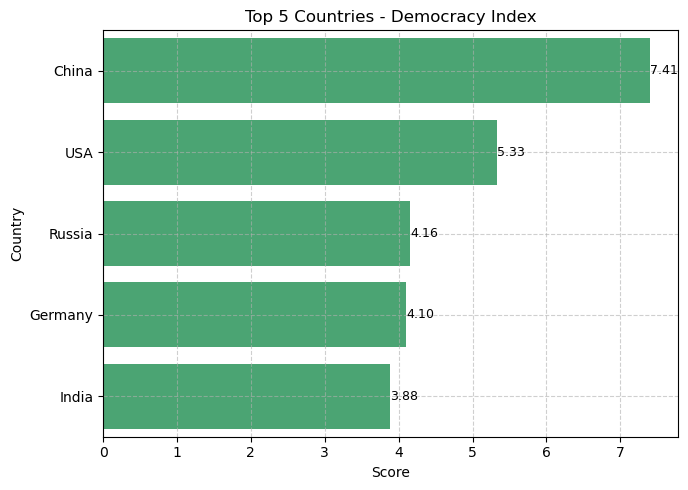

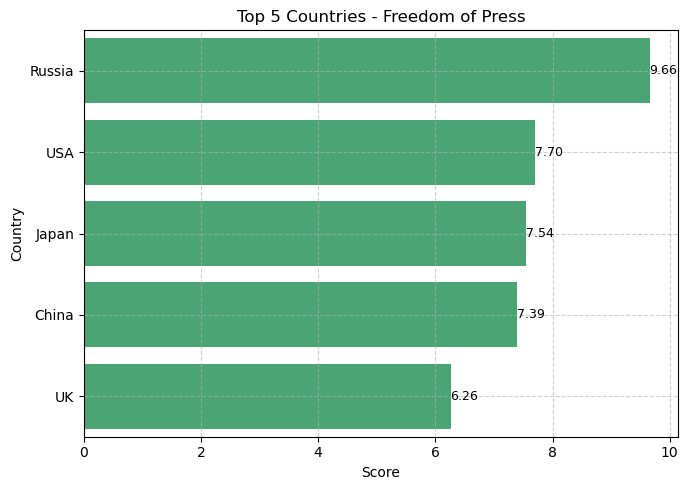

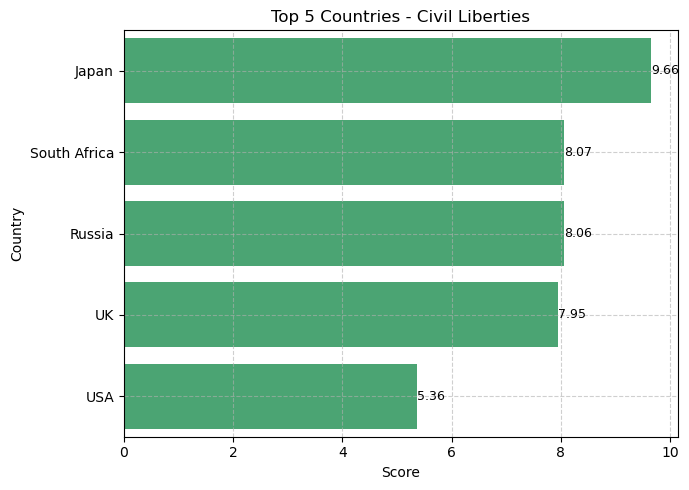

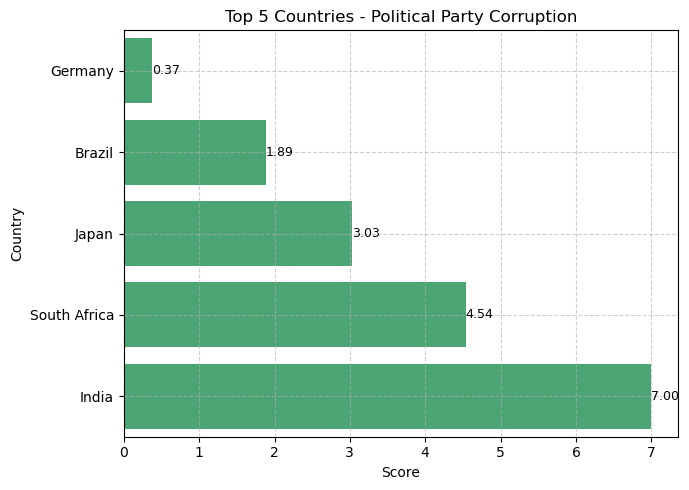

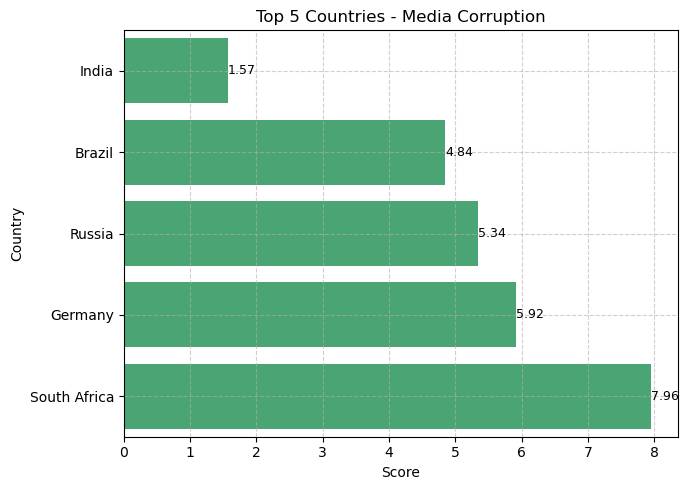

In [48]:
freedom_indicators = {
    'Democracy_Index': 'highest',
    'Freedom_of_Press': 'highest',
    'Civil_Liberties': 'highest',
    'Political_Party_Corruption': 'lowest',  # higher = more corruption
    'Media_Corruption': 'lowest'            # higher = more corruption
}

results = {}

# Extract Top 5 Countries for each indicator
for col, direction in freedom_indicators.items():
    temp_df = df_latest[['Country', 'Year', col]]
    
    if direction == 'highest':
        top = temp_df.sort_values(by=col, ascending=False).head(5)
    else:
        top = temp_df.sort_values(by=col).head(5)
    
    results[col] = top
    print(f"\nTop 5 Countries - {col.replace('_', ' ')} ({direction} priority):")
    print(top.to_string(index=False))

# Plot for each indicator
for col, _ in freedom_indicators.items():
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(data=results[col], x=col, y='Country', color='mediumseagreen', errorbar=None)

    plt.title(f"Top 5 Countries - {col.replace('_', ' ')}")
    plt.xlabel("Score")
    plt.ylabel("Country")
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=9)

    plt.tight_layout()
    plt.show()


# Socio-Economic Indicators

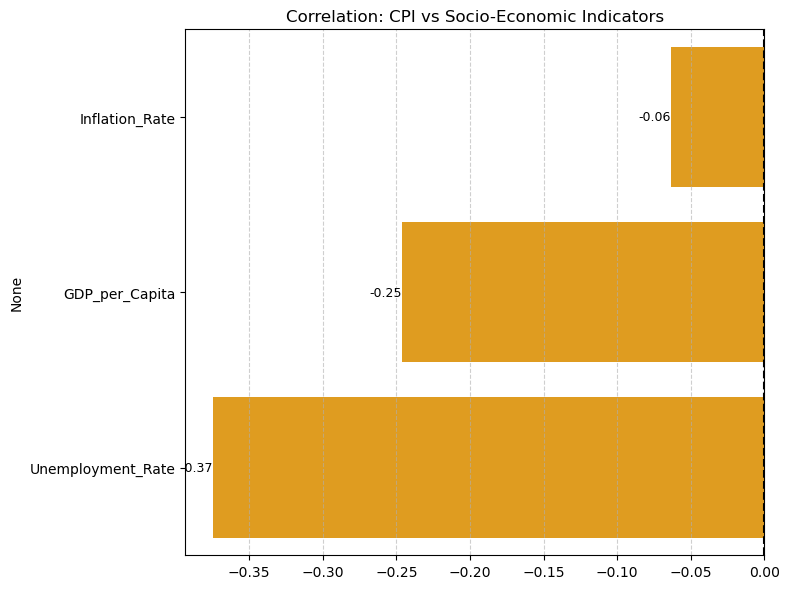

In [52]:
socio_columns = ['GDP_per_Capita', 'Unemployment_Rate', 'Inflation_Rate']
correlations_socio = compute_correlation(df_latest, socio_columns)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=correlations_socio.values, y=correlations_socio.index, color="orange")

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9)

plt.title("Correlation: CPI vs Socio-Economic Indicators")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Country-Wise Socio-Economic Indicators


Top 5 Countries - GDP per Capita (highest priority):
     Country  Year  GDP_per_Capita
South Africa  2023           64838
          UK  2023           58491
       India  2023           35448
      Russia  2023           31281
       Japan  2023           19209

Top 5 Countries - Unemployment Rate (lowest priority):
Country  Year  Unemployment_Rate
  India  2023           1.083695
    USA  2023           2.338312
Germany  2023           4.057629
 Russia  2023           4.532240
 Brazil  2023           5.018829

Top 5 Countries - Inflation Rate (lowest priority):
Country  Year  Inflation_Rate
 France  2023        0.154407
  Japan  2023        2.826519
 Brazil  2023        2.963360
    USA  2023        6.287740
 Russia  2023        7.411417


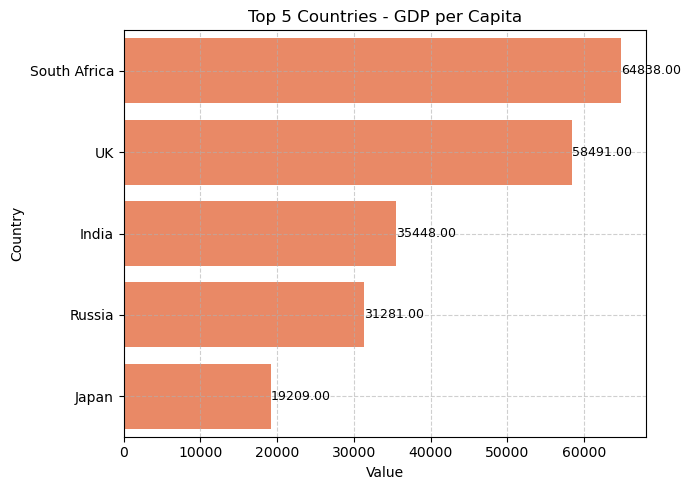

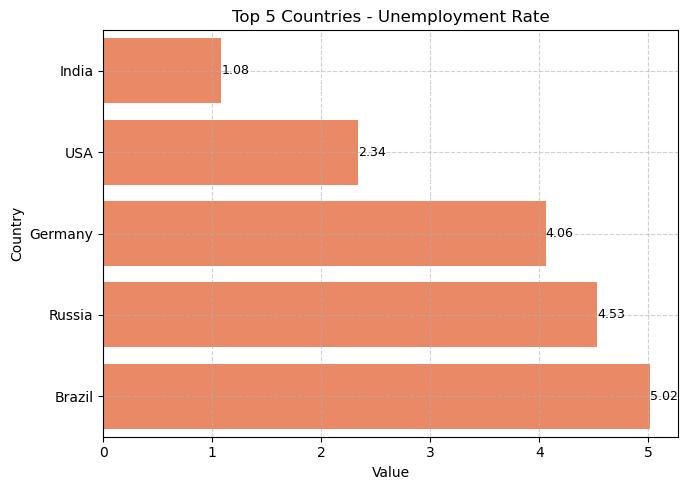

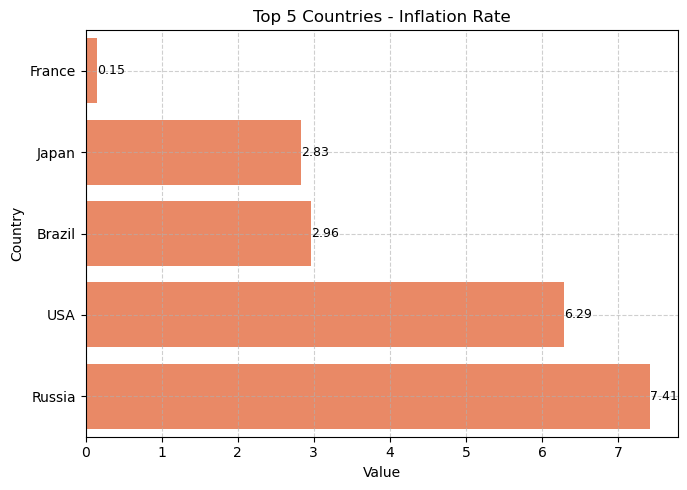

In [57]:
socio_econ_indicators = {
    'GDP_per_Capita': 'highest',
    'Unemployment_Rate': 'lowest',
    'Inflation_Rate': 'lowest'
}

results_se = {}

# Extract Top 5 Countries for each socio-economic indicator
for col, direction in socio_econ_indicators.items():
    if direction == 'highest':
        top = df_latest[['Country', 'Year', col]].sort_values(by=col, ascending=False).head(5)
    else:
        top = df_latest[['Country', 'Year', col]].sort_values(by=col).head(5)
    
    results_se[col] = top
    print(f"\nTop 5 Countries - {col.replace('_', ' ')} ({direction} priority):")
    print(top.to_string(index=False))

# Plot
for col, _ in socio_econ_indicators.items():
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(data=results_se[col], x=col, y='Country', color='coral', errorbar=None)

    plt.title(f"Top 5 Countries - {col.replace('_', ' ')}")
    plt.xlabel("Value")
    plt.ylabel("Country")
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=9)

    plt.tight_layout()
    plt.show()


# Development Indicators

Development Indicators - Correlation with CPI:
HDI                     0.488066
Internet_Penetration    0.455107
Education_Corruption    0.324692
Health_Corruption      -0.115907
Name: CPI_Score, dtype: float64


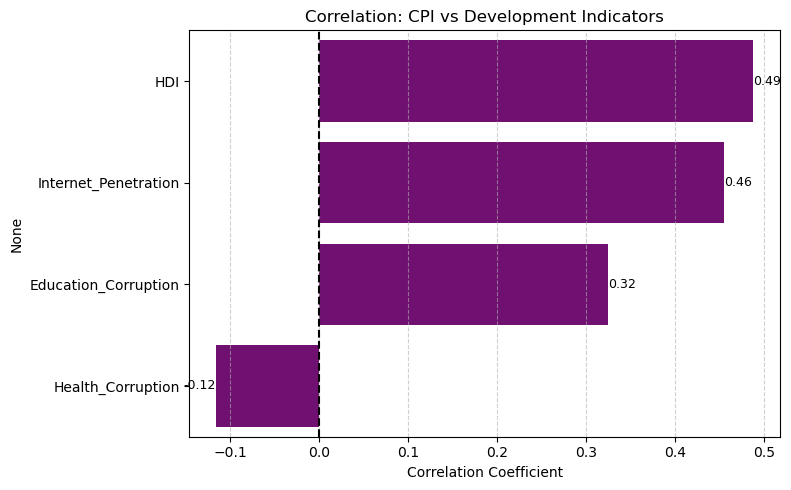

In [59]:
development_columns = ['HDI', 'Education_Corruption', 'Health_Corruption', 'Internet_Penetration']

# Calculate correlations
correlations_development = compute_correlation(df_latest, development_columns)

print("Development Indicators - Correlation with CPI:")
print(correlations_development)

# Plot with values on bars
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=correlations_development.values, y=correlations_development.index, color='purple')

# Add text labels on bars
for i, v in enumerate(correlations_development.values):
    ax.text(v, i, f"{v:.2f}", color='black', va='center', ha='right' if v < 0 else 'left', fontsize=9)

plt.title("Correlation: CPI vs Development Indicators")
plt.xlabel("Correlation Coefficient")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Country-Wise Development Indicators


Top 5 Countries - HDI (highest priority):
Country  Year      HDI
  Japan  2023 0.781844
 Brazil  2023 0.632544
  India  2023 0.568917
 France  2023 0.495976
 Russia  2023 0.466155

Top 5 Countries - Education Corruption (lowest priority):
Country  Year  Education_Corruption
  India  2023              1.112719
Germany  2023              2.839524
     UK  2023              3.962090
    USA  2023              4.470056
  Japan  2023              5.512500

Top 5 Countries - Health Corruption (lowest priority):
Country  Year  Health_Corruption
  India  2023           1.223395
 Brazil  2023           2.833630
 Russia  2023           3.922643
  Japan  2023           4.149588
    USA  2023           4.845459

Top 5 Countries - Internet Penetration (highest priority):
     Country  Year  Internet_Penetration
      France  2023             97.038304
South Africa  2023             95.561958
      Russia  2023             92.731339
       Japan  2023             88.669328
     Germany  2023       

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\2654605864.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x=col, y='Country', palette='coolwarm')


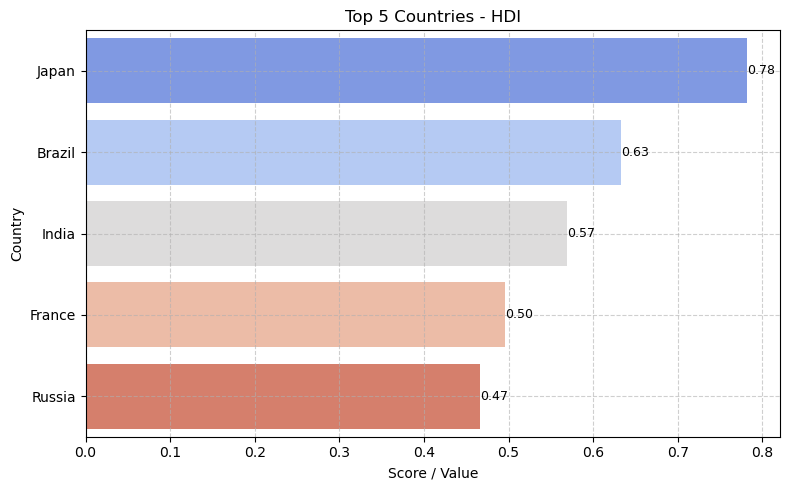

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\2654605864.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x=col, y='Country', palette='coolwarm')


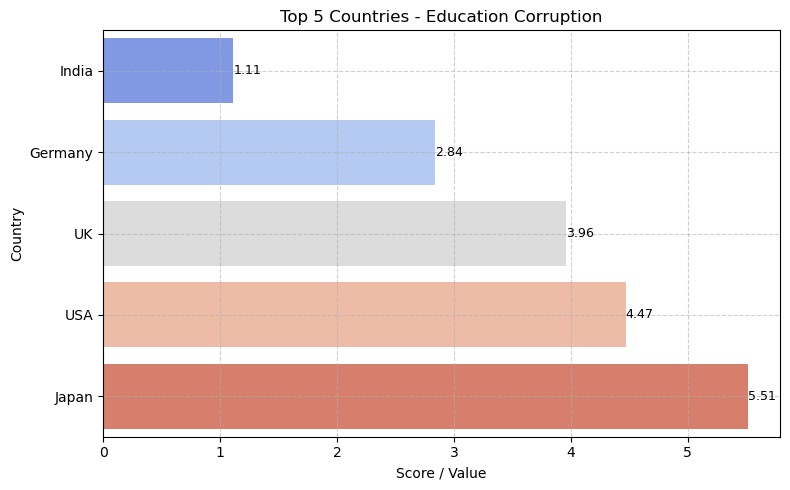

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\2654605864.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x=col, y='Country', palette='coolwarm')


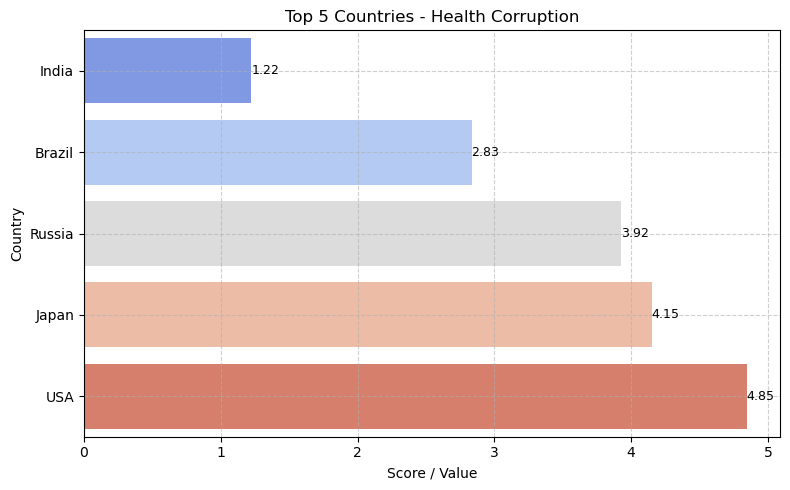

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\2654605864.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x=col, y='Country', palette='coolwarm')


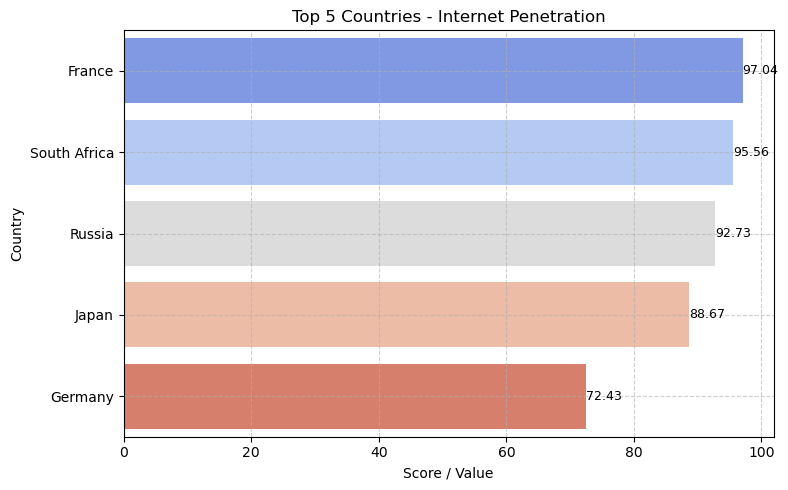

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

development_indicators = {
    'HDI': 'highest',
    'Education_Corruption': 'lowest',
    'Health_Corruption': 'lowest',
    'Internet_Penetration': 'highest'
}

results_dev = {}

# Prepare data
for col, direction in development_indicators.items():
    if direction == 'highest':
        top = df_latest[['Country', 'Year', col]].sort_values(by=col, ascending=False).head(5)
    else:
        top = df_latest[['Country', 'Year', col]].sort_values(by=col).head(5)
    
    results_dev[col] = top
    
    # Print table in terminal
    print(f"\nTop 5 Countries - {col.replace('_', ' ')} ({direction} priority):")
    print(top.to_string(index=False))
    
    # Optional: Export to CSV for PowerPoint use
    # top.to_csv(f"Top5_{col}.csv", index=False)

# Plot with value labels
for col, df_plot in results_dev.items():
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=df_plot, x=col, y='Country', palette='coolwarm')
    
    # Add text labels on bars
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', 
                ha='left', va='center', fontsize=9, color='black')
    
    plt.title(f"Top 5 Countries - {col.replace('_', ' ')}", fontsize=12)
    plt.xlabel("Score / Value")
    plt.ylabel("Country")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Governance & Institutional Quality


Governance & Institutional Quality - Correlation with CPI:
Regulatory_Quality          0.447755
Transparency_Index          0.163640
Bribery_Index              -0.016401
Business_Corruption        -0.077259
Foreign_Influence          -0.198392
Rule_of_Law                -0.221303
Corporate_Governance       -0.362788
Human_Rights_Index         -0.525968
Government_Effectiveness   -0.602997
Name: CPI_Score, dtype: float64


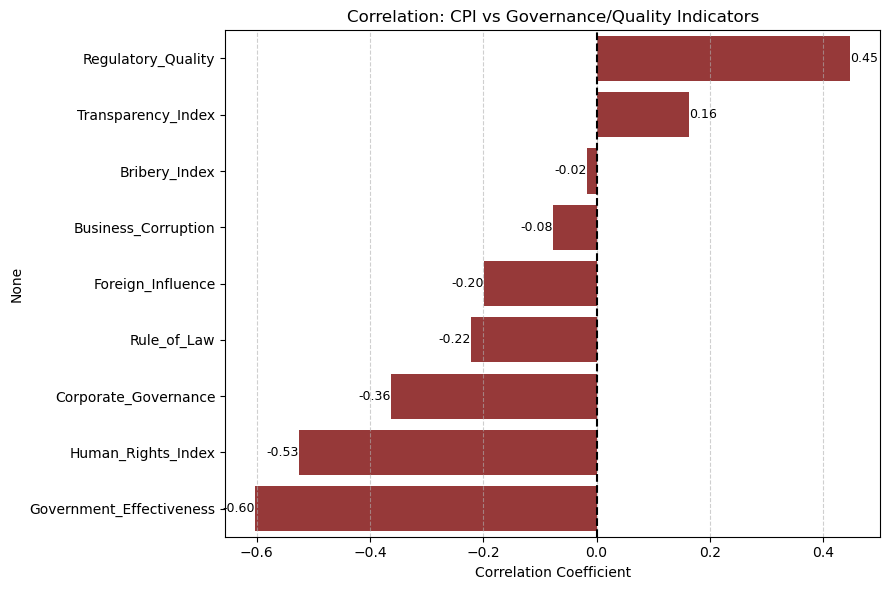

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Governance-related columns
gov_columns = [
    'Regulatory_Quality', 'Rule_of_Law', 'Government_Effectiveness',
    'Human_Rights_Index', 'Corporate_Governance', 'Transparency_Index',
    'Foreign_Influence', 'Bribery_Index', 'Business_Corruption'
]

# Compute correlations
correlations_gov = compute_correlation(df_latest, gov_columns)

print("\nGovernance & Institutional Quality - Correlation with CPI:")
print(correlations_gov)

# Plot with correlation values shown on bars
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=correlations_gov.values, y=correlations_gov.index, color="brown")

# Add text labels on bars
for i, v in enumerate(correlations_gov.values):
    ax.text(v, i, f"{v:.2f}", color='black', va='center', ha='right' if v < 0 else 'left', fontsize=9)

plt.title("Correlation: CPI vs Governance/Quality Indicators", fontsize=12)
plt.xlabel("Correlation Coefficient")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Top 5 Countries - Regulatory Quality
     Country  Year  Regulatory_Quality
      Brazil  2023            9.636566
       India  2023            9.519042
      Russia  2023            9.196455
South Africa  2023            6.219556
       China  2023            5.524652


C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')


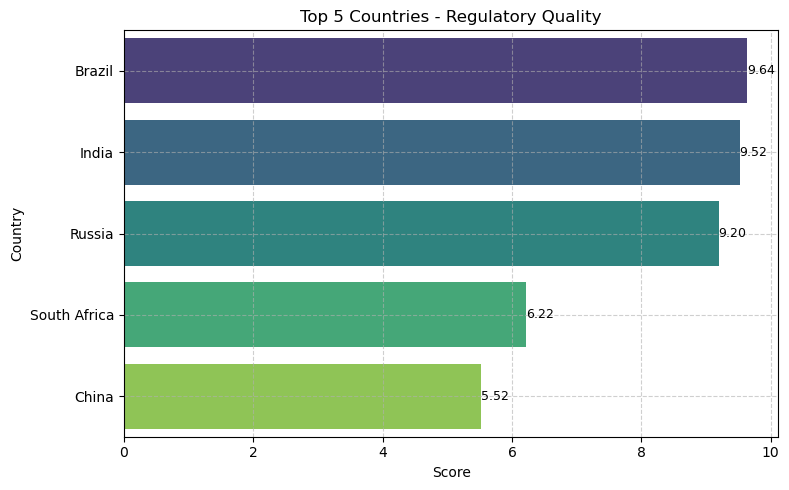


Top 5 Countries - Rule of Law
Country  Year  Rule_of_Law
  Japan  2023     9.157495
  China  2023     8.207340
    USA  2023     6.036759
     UK  2023     4.507480
 France  2023     4.328399


C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')


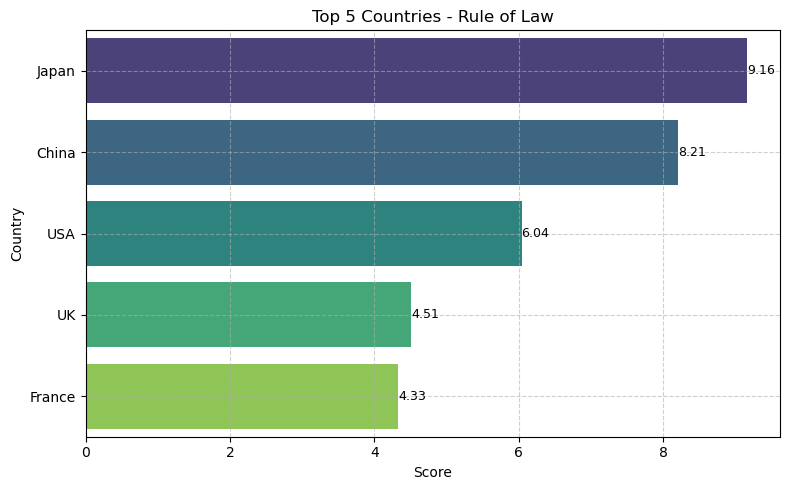

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')



Top 5 Countries - Government Effectiveness
Country  Year  Government_Effectiveness
  China  2023                  7.863575
 France  2023                  6.901729
     UK  2023                  5.444989
  Japan  2023                  2.691693
    USA  2023                  1.411002


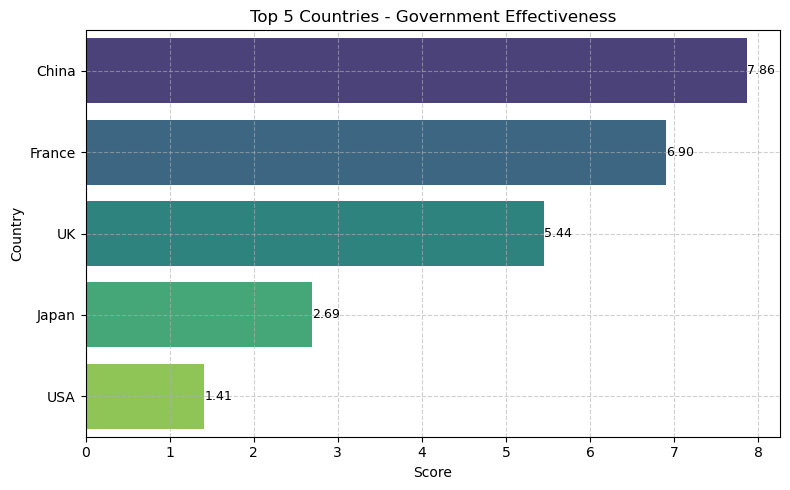


Top 5 Countries - Human Rights Index
     Country  Year  Human_Rights_Index
      France  2023            7.456995
          UK  2023            7.179928
       Japan  2023            5.925869
South Africa  2023            4.291704
     Germany  2023            3.916649


C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')


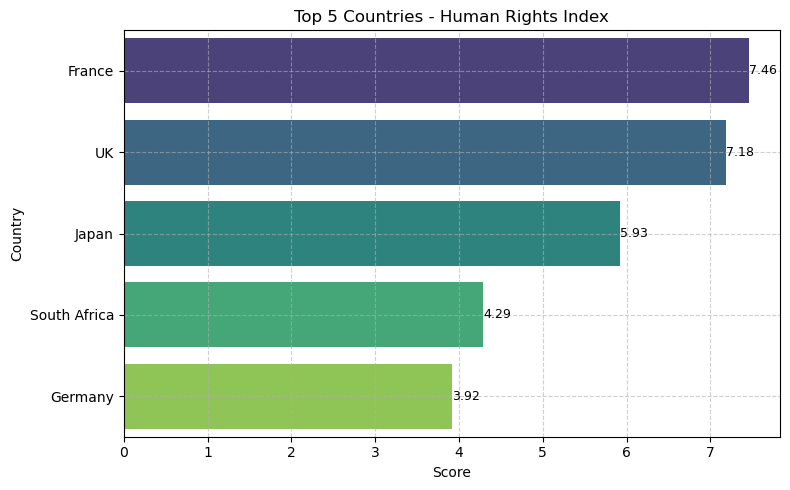

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')



Top 5 Countries - Corporate Governance
     Country  Year  Corporate_Governance
          UK  2023              9.866313
       India  2023              9.439600
South Africa  2023              6.414195
      Brazil  2023              5.200684
      Russia  2023              4.992358


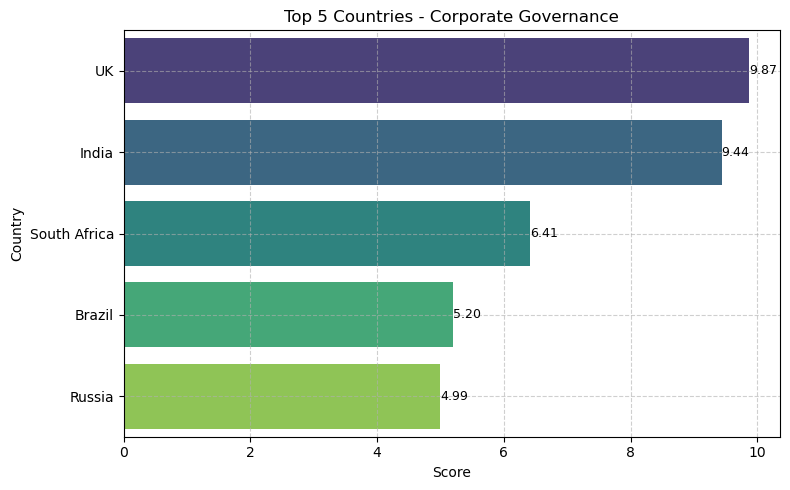


Top 5 Countries - Transparency Index
     Country  Year  Transparency_Index
South Africa  2023            8.573642
      Russia  2023            6.549404
       Japan  2023            6.442061
       India  2023            6.079339
         USA  2023            5.575036


C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')


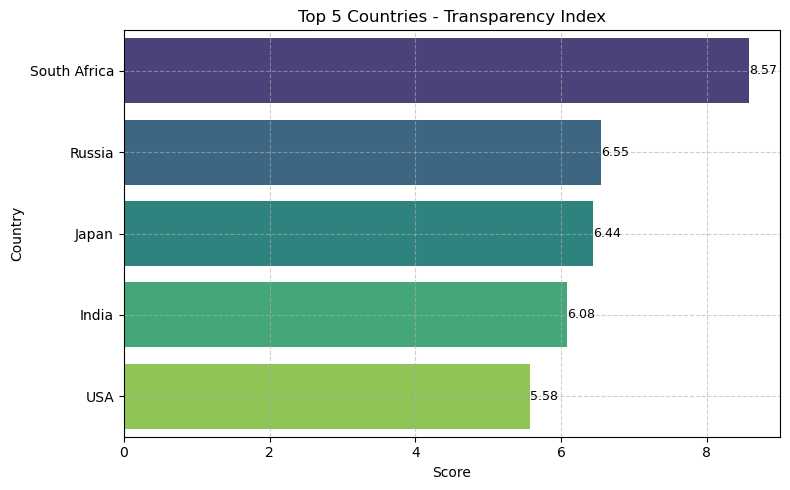


Top 5 Countries - Foreign Influence
Country  Year  Foreign_Influence
  India  2023           9.622750
  China  2023           7.784061
    USA  2023           6.823542
Germany  2023           5.979097
 Russia  2023           3.961600


C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')


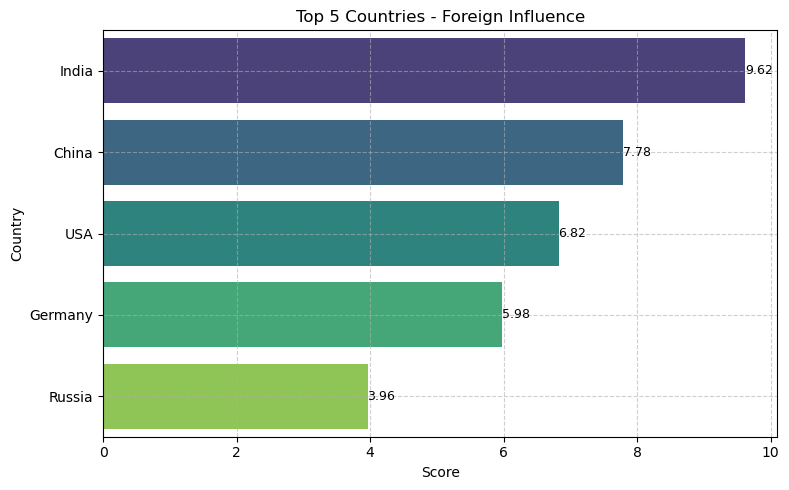


Top 5 Countries - Bribery Index
     Country  Year  Bribery_Index
     Germany  2023       8.294224
       China  2023       6.993107
South Africa  2023       5.652869
      France  2023       4.306716
         USA  2023       3.724307


C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')


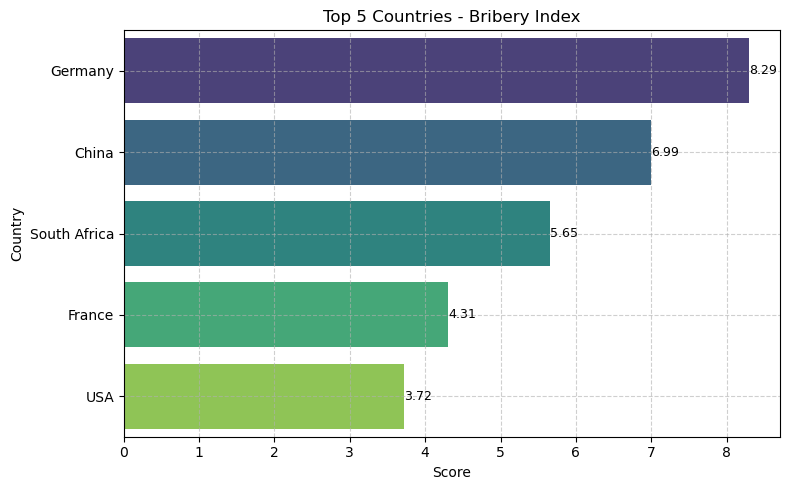

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\3562786147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x=col, y='Country', palette='viridis')



Top 5 Countries - Business Corruption
Country  Year  Business_Corruption
 France  2023             9.366809
Germany  2023             8.701333
 Brazil  2023             8.597251
    USA  2023             8.123731
  Japan  2023             6.913431


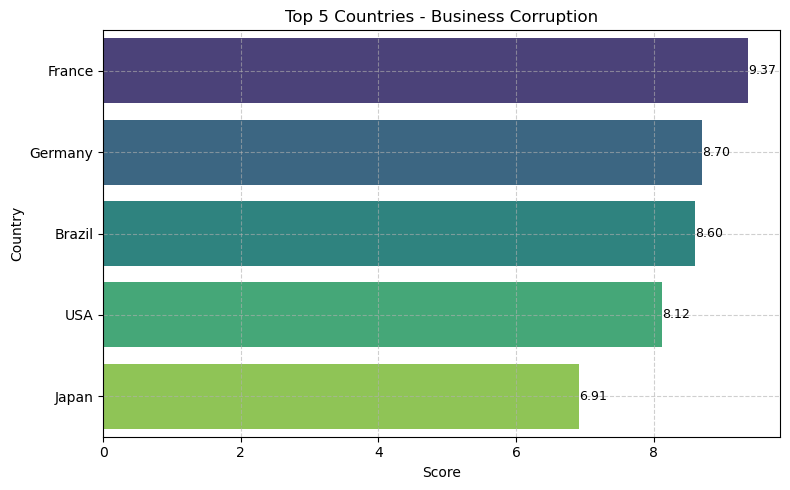

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in gov_columns:
    # Top 5 countries by indicator
    top = df_latest[['Country', 'Year', col]].sort_values(by=col, ascending=False).head(5)
    print(f"\nTop 5 Countries - {col.replace('_', ' ')}")
    print(top.to_string(index=False))

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(data=top, x=col, y='Country', palette='viridis')

    # Add values on bars
    for index, value in enumerate(top[col]):
        plt.text(value, index, f"{value:.2f}", color='black', va='center', ha='left', fontsize=9)

    plt.title(f"Top 5 Countries - {col.replace('_', ' ')}", fontsize=12)
    plt.xlabel("Score")
    plt.ylabel("Country")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Advanced Insights

# CPI Score vs Democracy Index


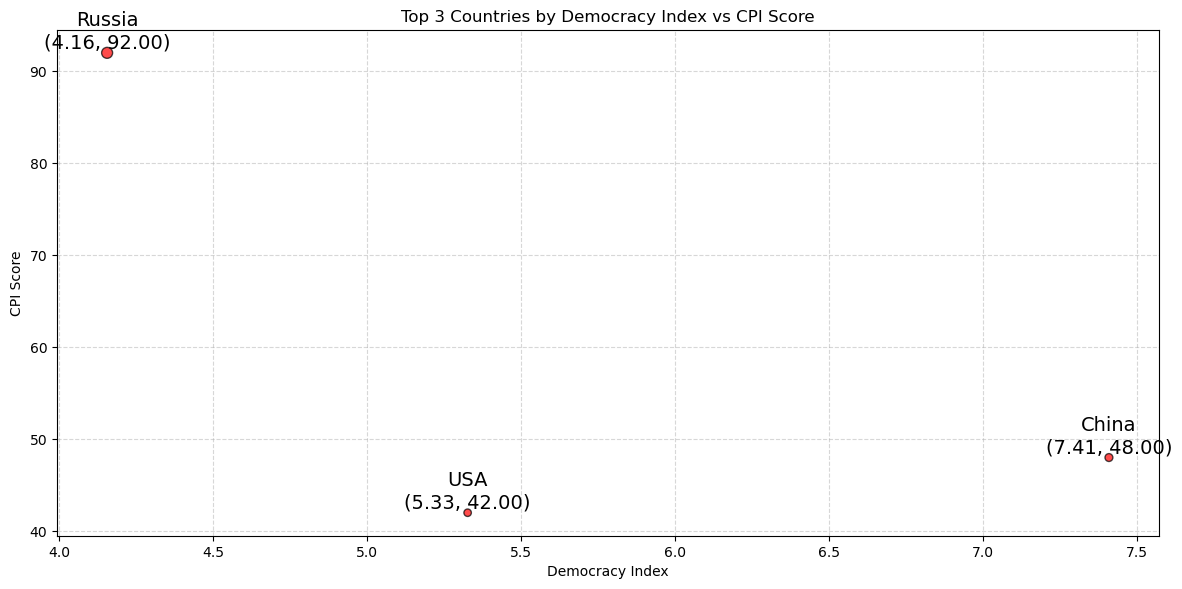

In [68]:
import matplotlib.pyplot as plt

# Top 3 by Democracy Index
top3_demo = df_latest.sort_values(by='Democracy_Index', ascending=False).head(3)

plt.figure(figsize=(12, 6))
plt.scatter(
    top3_demo['Democracy_Index'],
    top3_demo['CPI_Score'],
    s=top3_demo['GDP_per_Capita'] / 500,
    c='red',
    alpha=0.7,
    edgecolors='black'
)

# Annotate with smaller offset for closer placement
for i, row in top3_demo.iterrows():
    plt.text(
        row['Democracy_Index'],
        row['CPI_Score'] + 0.1,  # Slightly above the dot
        f"{row['Country']}\n({row['Democracy_Index']:.2f}, {row['CPI_Score']:.2f})",
        fontsize=14,
        color='black',
        ha='center',
        va='bottom'
    )

plt.xlabel("Democracy Index")
plt.ylabel("CPI Score")
plt.title("Top 3 Countries by Democracy Index vs CPI Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# CPI Score vs HDI


In [70]:
# Generate the text info manually as in hover
for i, row in df_latest.iterrows():
    print(f"Country: {row['Country']}")
    print(f"Region: {row['Region']}")
    print(f"HDI: {row['HDI']}")
    print(f"CPI Score: {row['CPI_Score']}")
    print(f"GDP per Capita: {row['GDP_per_Capita']}")
    print('-' * 40)


Country: Brazil
Region: Oceania
HDI: 0.632543690560268
CPI Score: 89
GDP per Capita: 8939
----------------------------------------
Country: China
Region: Africa
HDI: 0.1529182622677674
CPI Score: 48
GDP per Capita: 16056
----------------------------------------
Country: France
Region: Americas
HDI: 0.4959757028578311
CPI Score: 25
GDP per Capita: 7029
----------------------------------------
Country: Germany
Region: Americas
HDI: 0.3913768566308064
CPI Score: 69
GDP per Capita: 9221
----------------------------------------
Country: India
Region: Africa
HDI: 0.5689174075005099
CPI Score: 34
GDP per Capita: 35448
----------------------------------------
Country: Japan
Region: Europe
HDI: 0.781844179462262
CPI Score: 72
GDP per Capita: 19209
----------------------------------------
Country: Russia
Region: Africa
HDI: 0.4661554914931261
CPI Score: 92
GDP per Capita: 31281
----------------------------------------
Country: South Africa
Region: Oceania
HDI: 0.1508687197221249
CPI Score: 64
GD

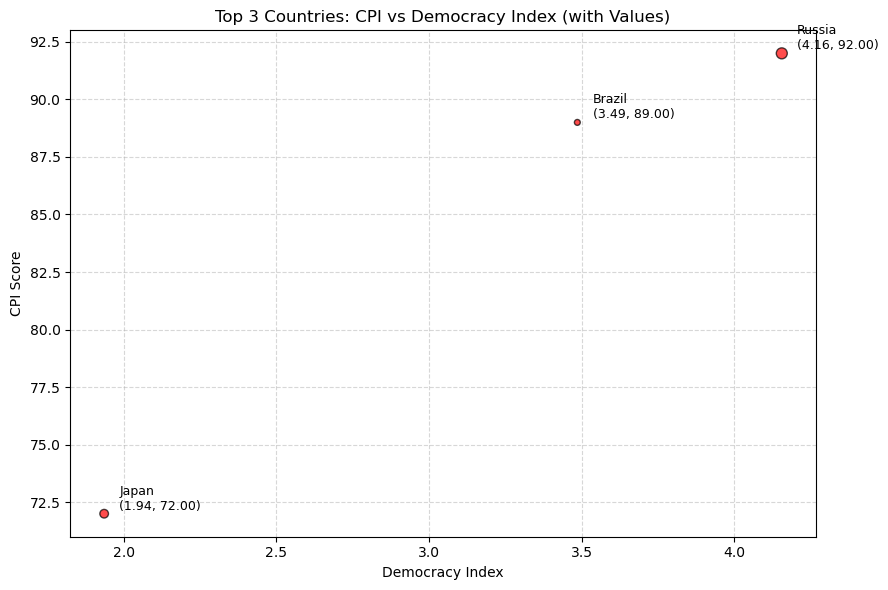

In [71]:
import matplotlib.pyplot as plt

top3 = df_latest.sort_values(by='CPI_Score', ascending=False).head(3)

plt.figure(figsize=(9, 6))
scatter = plt.scatter(
    top3['Democracy_Index'],
    top3['CPI_Score'],
    s=top3['GDP_per_Capita'] / 500,
    c='red',
    alpha=0.7,
    edgecolors='black'
)

# Plot text close to the red dot (small x, y shift for clarity)
for i, row in top3.iterrows():
    plt.text(
        row['Democracy_Index'] + 0.05,  # Small right shift
        row['CPI_Score'] + 0.05,        # Small upward shift
        f"{row['Country']}\n({row['Democracy_Index']:.2f}, {row['CPI_Score']:.2f})",
        fontsize=9,
        color='black',
        ha='left',  # Align left
        va='bottom' # Align bottom
    )

plt.xlabel("Democracy Index")
plt.ylabel("CPI Score")
plt.title("Top 3 Countries: CPI vs Democracy Index (with Values)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Outlier & Anomaly Detection


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare data
df_clean = df_latest.dropna(subset=['GDP_per_Capita', 'CPI_Score'],).copy()

# Calculate thresholds for anomaly detection
gdp_threshold = np.percentile(df_clean['GDP_per_Capita'], 75)
cpi_threshold = np.percentile(df_clean['CPI_Score'], 25)

df_clean['Anomaly'] = np.where(
    (df_clean['GDP_per_Capita'] > gdp_threshold) & (df_clean['CPI_Score'] < cpi_threshold),
    'Anomaly', 'Normal'
)

# Split into two datasets
anomalies = df_clean[df_clean['Anomaly'] == 'Anomaly']
normal = df_clean[df_clean['Anomaly'] == 'Normal']

# Show Normal & Anomaly counts
print(f"Total Records: {len(df_clean)}")
print(f"Normal Countries: {len(normal)}")
print(f"Anomaly Countries: {len(anomalies)}")

print("\n--- NORMAL COUNTRIES ---")
print(normal[['Country', 'GDP_per_Capita', 'CPI_Score']].head(10))  # show first 10 rows

print("\n--- ANOMALY COUNTRIES (High GDP, Low CPI) ---")
print(anomalies[['Country', 'GDP_per_Capita', 'CPI_Score']])

Total Records: 10
Normal Countries: 8
Anomaly Countries: 2

--- NORMAL COUNTRIES ---
          Country  GDP_per_Capita  CPI_Score
101        Brazil            8939         89
349         China           16056         48
89         France            7029         25
11        Germany            9221         69
279         Japan           19209         72
187        Russia           31281         92
15   South Africa           64838         64
386           USA           14392         42

--- ANOMALY COUNTRIES (High GDP, Low CPI) ---
   Country  GDP_per_Capita  CPI_Score
20   India           35448         34
97      UK           58491         10


Total Records: 10
Normal Countries: 8
Anomaly Countries: 2


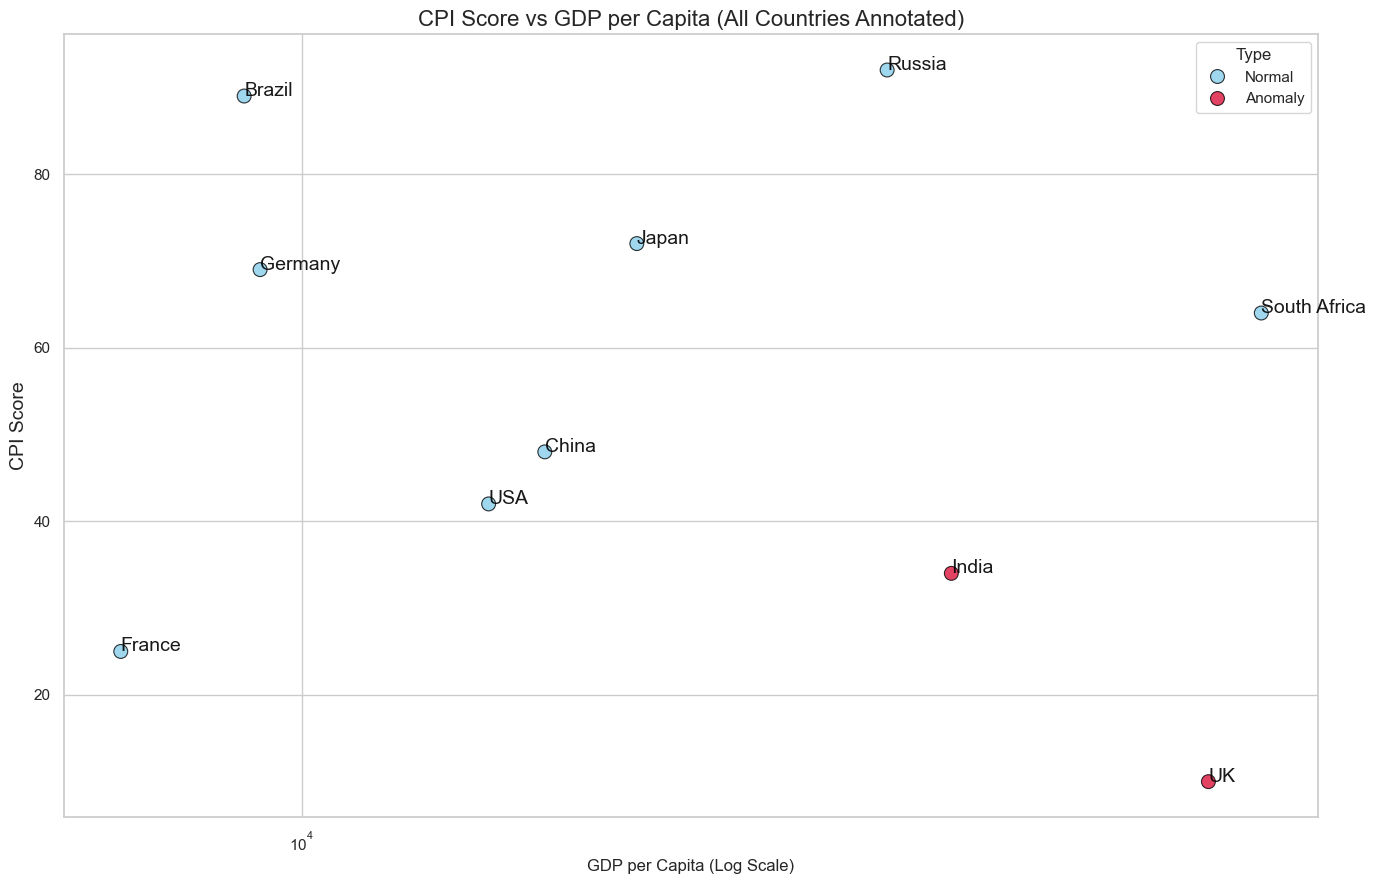

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare data
df_clean = df_latest.dropna(subset=['GDP_per_Capita', 'CPI_Score']).copy()

# Calculate thresholds for anomaly detection
gdp_threshold = np.percentile(df_clean['GDP_per_Capita'], 75)
cpi_threshold = np.percentile(df_clean['CPI_Score'], 25)

df_clean['Anomaly'] = np.where(
    (df_clean['GDP_per_Capita'] > gdp_threshold) & (df_clean['CPI_Score'] < cpi_threshold),
    'Anomaly', 'Normal'
)

# Split datasets
anomalies = df_clean[df_clean['Anomaly'] == 'Anomaly']
normal = df_clean[df_clean['Anomaly'] == 'Normal']

# Show summary
print(f"Total Records: {len(df_clean)}")
print(f"Normal Countries: {len(normal)}")
print(f"Anomaly Countries: {len(anomalies)}")

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 9))

palette = {'Normal': 'skyblue', 'Anomaly': 'crimson'}

sns.scatterplot(
    data=df_clean,
    x='GDP_per_Capita',
    y='CPI_Score',
    hue='Anomaly',
    palette=palette,
    alpha=0.8,
    edgecolor='black',
    s=100
)

# Annotate ALL countries
for i in range(len(df_clean)):
    plt.text(
        df_clean['GDP_per_Capita'].iloc[i],
        df_clean['CPI_Score'].iloc[i],
        df_clean['Country'].iloc[i],
        fontsize=14,
        color='black',
        alpha=0.9
    )

plt.xscale('log')
plt.title('CPI Score vs GDP per Capita (All Countries Annotated)', fontsize=16)
plt.xlabel('GDP per Capita (Log Scale)', fontsize=12)
plt.ylabel('CPI Score', fontsize=14)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()


# TOP 3 IMPROVONG COUNTRIES

In [82]:
# Handle duplicates by selecting the max CPI_Score for each Country-Year
df_clean = df.groupby(['Country', 'Year'], as_index=False)['CPI_Score'].max()

# Pivot data to wide format: Country as index, Years as columns
country_scores = df_clean.pivot(index='Country', columns='Year', values='CPI_Score')

# Interpolate missing values (optional, safe if all years present)
country_scores = country_scores.interpolate(method='linear', axis=1)

# Compute improvement for each country
country_scores['Improvement'] = country_scores.max(axis=1) - country_scores.min(axis=1)

# Get Top 5 improving countries
top_improvers = country_scores.sort_values(by='Improvement', ascending=False).head(5)

# ----- Print the full table of Top Improvers -----
print("\nTop 5 Improving Countries (Full Table):")
top_improvers





Top 5 Improving Countries (Full Table):


Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Improvement
Country,,,,,,,,,,,,,,,,,,,,,
USA,96,86,99,90,98,96,99,99,97,88,...,97,99,98,84,88,98,97,69,97,30
Japan,92,95,99,99,98,91,71,94,96,97,...,85,85,96,89,93,96,95,98,95,28
South Africa,92,96,91,97,96,98,79,86,71,97,...,92,99,88,97,83,97,98,86,88,28
Germany,84,97,96,98,90,99,88,82,95,93,...,94,97,94,96,87,94,93,72,80,27
India,92,99,96,99,95,94,85,97,73,87,...,96,95,91,99,99,98,98,96,80,26


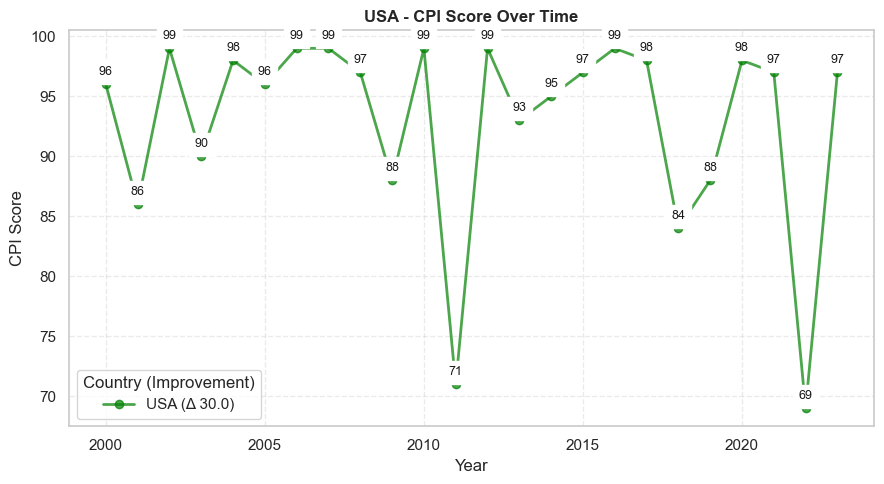

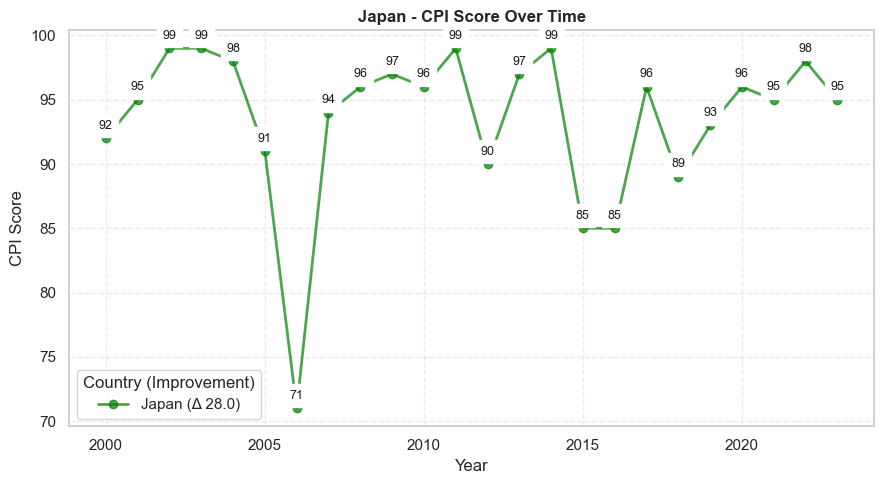

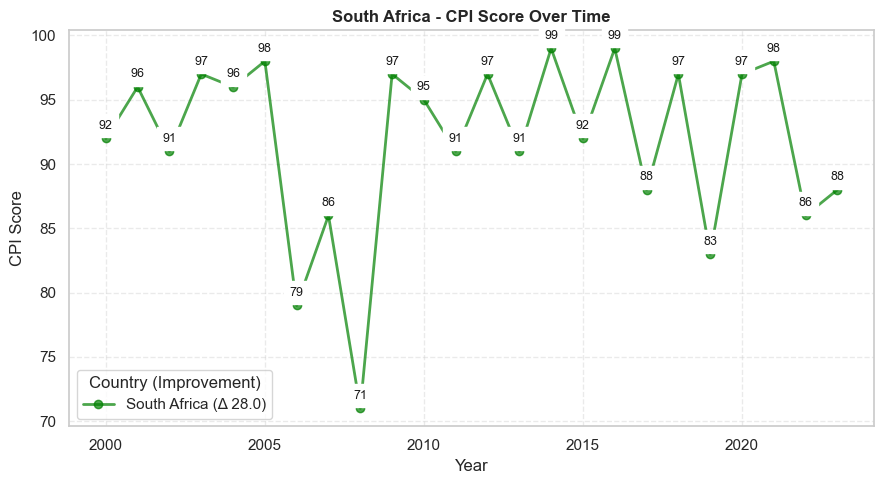

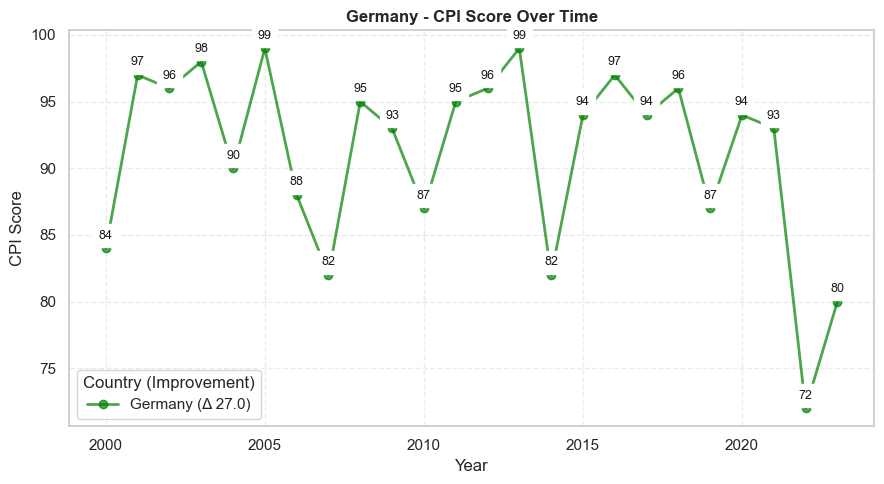

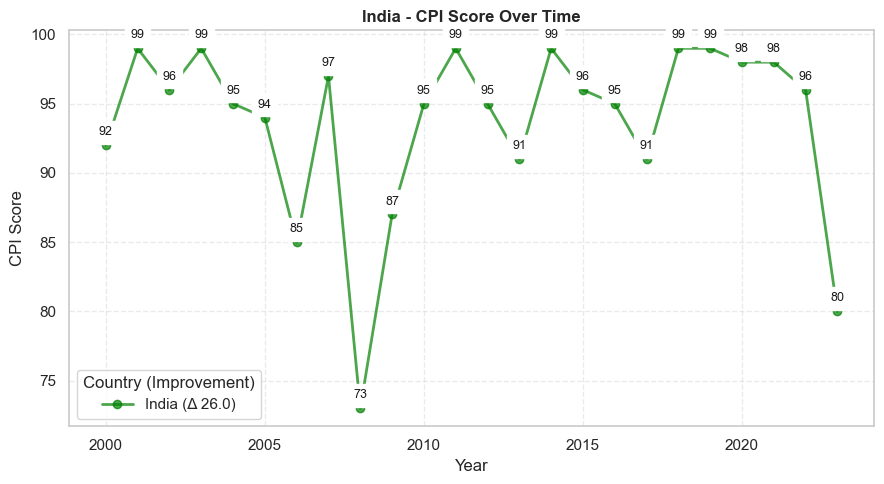

In [85]:
# Plot separately for each of the top 5 improving countries
for country in top_improvers.index:
    plt.figure(figsize=(9, 5))
    
    years = country_scores.columns[:-1]
    cpi_scores = country_scores.loc[country][:-1]
    
    # Plot line with moderate transparency and thicker line
    plt.plot(years, cpi_scores, marker='o', linestyle='-', color='green', alpha=0.7, linewidth=2, label=f"{country} (Δ {top_improvers.loc[country, 'Improvement']:.1f})")
    
    # Place value labels slightly *above* each point with improved contrast and slight transparency background
    for x, y in zip(years, cpi_scores):
        plt.text(x, y + 0.5, f"{y:.0f}", fontsize=9, ha='center', va='bottom', color='black', alpha=0.9, backgroundcolor='white')
    
    plt.title(f"{country} - CPI Score Over Time", fontsize=12, weight='bold')
    plt.xlabel("Year")
    plt.ylabel("CPI Score")
    plt.legend(title="Country (Improvement)")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


# TOP 3 DECLINING COUNTRIES

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Clean the dataset: Handle duplicates by selecting max CPI_Score for each Country-Year
df_clean = df.groupby(['Country', 'Year'], as_index=False)['CPI_Score'].max()

# Pivot data to wide format: Country as index, Years as columns
country_scores = df_clean.pivot(index='Country', columns='Year', values='CPI_Score')

# Interpolate missing values (optional if all years present)
country_scores = country_scores.interpolate(method='linear', axis=1)

# Compute improvement for each country
country_scores['Improvement'] = country_scores.max(axis=1) - country_scores.min(axis=1)

# Get Top 3 declining countries
top_decliners = country_scores.sort_values(by='Improvement', ascending=True).head(3)

# Display Table of Values for Reference
print("\nTop 3 Declining Countries (Full Table):")
top_decliners





Top 3 Declining Countries (Full Table):


Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Improvement
Country,,,,,,,,,,,,,,,,,,,,,
China,97,97,96,95,86,87,94,99,82,98,...,85,99,87,97,87,93,88,97,94,17
Brazil,90,92,95,80,95,97,91,94,83,80,...,83,92,82,91,99,98,90,97,89,19
UK,96,97,96,91,95,88,99,98,92,94,...,97,84,89,97,94,98,98,96,80,19


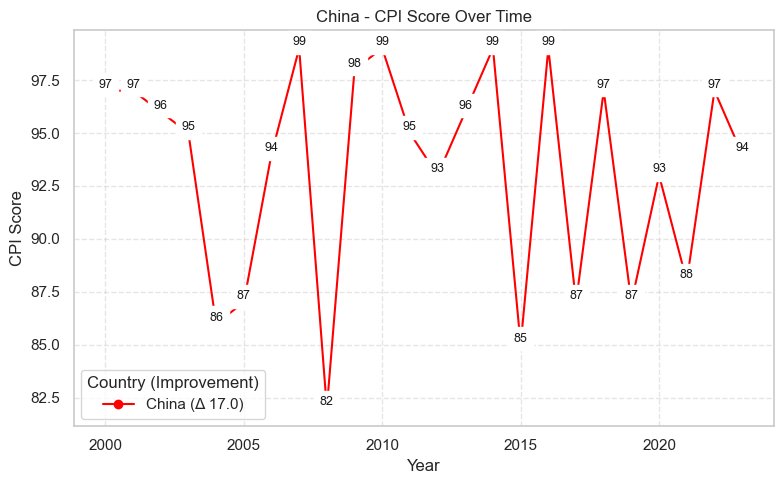

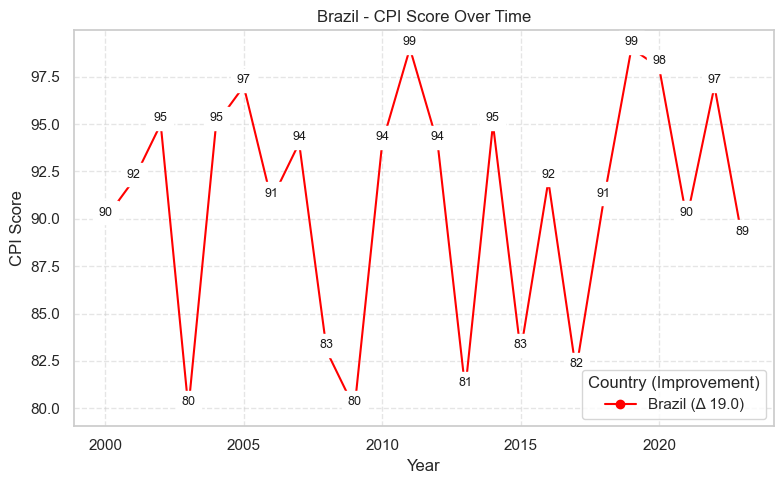

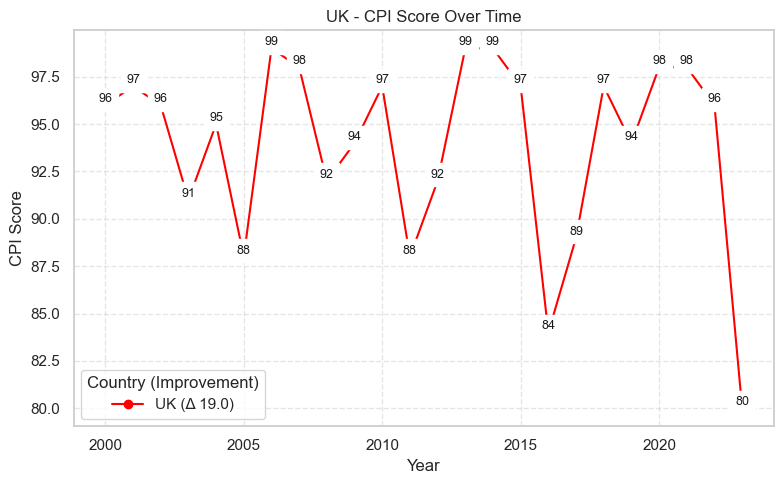

In [90]:
# Plot separately for each of the top 3 declining countries
for country in top_decliners.index:
    plt.figure(figsize=(8, 5))
    
    years = country_scores.columns[:-1]
    scores = country_scores.loc[country][:-1]
    
    plt.plot(years, scores, marker='o', label=f"{country} (Δ {top_decliners.loc[country, 'Improvement']:.1f})", color='red')
    
    # Annotate each point with its value, closer to the line with better transparency
    for x, y in zip(years, scores):
        plt.text(x, y, f"{y:.0f}", fontsize=9, color='black', alpha=0.9, ha='center', va='bottom', backgroundcolor='white')
    
    plt.title(f"{country} - CPI Score Over Time")
    plt.xlabel("Year")
    plt.ylabel("CPI Score")
    plt.legend(title="Country (Improvement)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [92]:
sector_columns = [
    'Public_Sector_Corruption', 'Judicial_Corruption', 'Police_Corruption',
    'Executive_Branch_Corruption', 'Legislative_Corruption', 'Bribery_Index',
    'Business_Corruption', 'Health_Corruption', 'Education_Corruption',
    'Media_Corruption', 'Political_Party_Corruption'
]

# Filter data for top 3 improving countries
df_top3 = df_latest[df_latest['Country'].isin(top_3_countries)]

# Compute correlation between CPI_Score and each sector-wise corruption column
correlations = df_top3[sector_columns + ['CPI_Score']].corr()['CPI_Score'].drop('CPI_Score').sort_values(ascending=False)

# Display the correlations
print("Sector-wise Correlation with CPI Score for Top 3 Improving Countries:")
print(correlations)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Sector-wise Correlation with CPI Score\n(Top 3 Improving Countries)')
plt.xlabel('Correlation with CPI Score')
plt.ylabel('Corruption Sector')
plt.show()


NameError: name 'top_3_countries' is not defined

In [ ]:
# Compute decline for each country
country_scores['Decline'] = country_scores.max(axis=1) - country_scores.min(axis=1)

# Sort by *least* improvement (or most negative change)
top_decliners = country_scores.sort_values(by='Improvement').head(3)
top_3_decliners = top_decliners.index.tolist()

print("Top 3 Declining Countries:")
print(top_3_decliners)


In [ ]:
sector_columns = [
    'Public_Sector_Corruption', 'Judicial_Corruption', 'Police_Corruption',
    'Executive_Branch_Corruption', 'Legislative_Corruption', 'Bribery_Index',
    'Business_Corruption', 'Health_Corruption', 'Education_Corruption',
    'Media_Corruption', 'Political_Party_Corruption'
]

# Filter data for top 3 declining countries
df_decliners = df_latest[df_latest['Country'].isin(top_3_decliners)]

# Compute correlation between CPI_Score and each sector-wise corruption column
decline_correlations = df_decliners[sector_columns + ['CPI_Score']].corr()['CPI_Score'].drop('CPI_Score')

# Filter ONLY negative correlations and sort
negative_correlations = decline_correlations[decline_correlations < 0].sort_values()

print("❗ Only Negatively Correlated Sectors with CPI Score (Top 3 Declining Countries):")
print(negative_correlations)

# Plot ONLY negative correlations
plt.figure(figsize=(10,6))
sns.barplot(x=negative_correlations.values, y=negative_correlations.index, palette='magma')  # Red reversed for negative impact
plt.title('Sector-wise Correlation with CPI Score\n(Top 3 Declining Countries)')
plt.xlabel('Correlation with CPI Score')
plt.ylabel('Corruption Sector')
plt.show()
